# The Power of Political Tweets On and Off the Court

# Overview

Many players have used social media to voice their opinions on serious social injustice issues over the years, but 2020 in particular has given rise to an enormous amount of politically charged inequity. With that, there has been an increase in tweets made by NBA players about these issues and we wanted to find a correlation between the amount of political tweets and its effect on their salary, on-court performance and overall impact to the team.To accomplish this, we used two different datasets: one that reports all NBA players’ performance statistics and the other that reports the most recent 3000 tweets from those players with active twitter accounts. We then took the twitter dataset and performed a text analysis to find words relating to politics and/or social injustice, in order to parse the political tweets from the non-political tweets. We found that there is no statiscally significant correlation between the political tweet, retweet, and favorite proportion, and a player’s on-court performance, salary and impact to the team most of the time during 2017-2021. 

# Names

- Chao-Li Wei
- Quinton Ramasamy
- Lauren Gomez
- Alexander G. Arias
- David Marquez

<a id='research_question'></a>
# Research Question

 How does the number, favorite count, and retweet count of NBA players' political tweets affect their salary, on-court performance, and impact to the team during 2017-2021?<br>

<a id='background'></a>

## Background & Prior Work

The NBA has been most active in expressing its political messages as a league among all other sports such as NFL, NHL, or UFC. This heightened political activism perceives both positive and negative feedback from the general public. The former President Donald Trump told reporters on Air Force One on 8/28/2020 that "what they’re doing to the NBA in particular is gonna destroy basketball" (1). In contrast, some argue that the NBA is making "a commitment to justice unique among the major men’s sports leagues" (2). To understand the relationship between an NBA player's success and his political involvement, we will analyze the the relationship between individual NBA player's salary, on-count performance, and impact to the team, with the quantity and impact of the player's political posts on Twitter, one of the most vocal platforms for NBA players to express their opinions about politics and social justice.

A research conducted by Marist poll, a rigorous, scientific-based, telephone survey (4), discovered that politics appear to be playing a role in the enormous drop in viewership for some professional sports, with "46 percent of self-described sports fans say they are spending less time watching live sports broadcasts than in the past" (5).
The survey was conducted in September 2020 by The Marist Poll in partnership with the Marist College Center for Sports Communication to identify a relationship between personal and public concerns such as COVID-19 and Social Justice and an individuals willingness to continue watching live sports. (3)
The most relevant result of the study was about sports fans who were asked to describe the viewing impact of athletes’ calls for racial justice. In this particular case, 70% of identifying Republicans said they were less likely to watch live sports for this reason. Meanwhile, 61% of Democrats and a plurality of Independents (47%) say athletes speaking out has not changed their viewing habits, while about 3 in 10 (31% and 24%, respectively) say this is the reason for them tuning in more often.
As a result, it appears that the political climate has a potential impact on sport-related ratings and success. However, it is also important to note that other findings were established by the Marist Poll in this particular study.
References (include links):
- 1) [Political protests by NBA players will 'destroy basketball', says Trump](https://www.theguardian.com/sport/2020/aug/29/political-protests-by-nba-players-will-destroy-basketball-says-trump)
- 2) [Colliding Contradictions Crack the NBA’s Political Facade](https://www.theringer.com/nba/2020/8/27/21404988/nba-strike-colliding-contradictions)
- 3) [Sports Fans Watching Fewer Live Sports Broadcasts Survey](http://maristpoll.marist.edu/wp-content/uploads/2020/10/Marist-Poll_Sports-Communication_USA-Complete-Survey-Findings_202010091420-1.pdf#page=4)
- 4) [Marist Poll Methodology](http://maristpoll.marist.edu/methods/#sthash.Qc1TTLTh.dpbs)
- 5) [Study reveals reasons for enormous drop in sports viewership, including political dynamic](https://www.miamiherald.com/sports/spt-columns-blogs/barry-jackson/article246514675.html)
- 6) [NBA Statistics](https://data.world/datasets/nba)

# Hypothesis


We believe that the NBA players who have more influence on their political tweets (i.e. average number of favorite/retweet count per political Twitter post), are more likely to be famed among the public and thus a better player court-wise and salary-wise. Therefore, we hypothesize that an increase of an NBA player's influence of political tweets is likely to be directly proportional to the player's on-court performance and their salary in the NBA.

# Dataset(s)

- Dataset Name: main_data.csv
- Link to the dataset:https://www.basketball-reference.com/players/
- Number of observations: 2818 <br>

Player stats from 2017-2021 and player salaries from 2017-2020. All data taken from player pages on basketball-reference.com. Salary data for 2021 stats is null

- Dataset Name: salaries_2021.csv
- Link to the dataset:https://www.basketball-reference.com/contracts/players.html
- Number of observations: 563 <br>

Player name and corresponding salary for the current NBA season. Taken from table with current NBA contracts

- Dataset Name: nba_political_1, nba_political_2, nba_political_3, nba_political_4
- Link to the dataset:https://twitter.com/
- Number of observations: 200, 180, 170, 154 <br>

Last 3000 tweets of all current NBA players. Includes the number of political tweets determined by a list of political words we created as well as the filtered and tokenized tweets used for the analysis. Cleaned and obtained using a Twitter developer account with the Twitter API.


# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import datetime
import patsy
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, f1_score
pd.set_option("display.max_columns", 6)

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('stopwords')

!pip install wordcloud
!pip install pyldavis
import os
import re
# os.chdir('..')
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 
import sys
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\Michael\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Data Scraping

To obtain the data from basketball-reference.com we used a public python package called basketball-reference-scraper and utilized their API to obtain player stats. We also edited some of their methods to scrape salary data. We edited the players.py file to scrape tables directly from basketball-reference.com and put them into main_data.csv. The methods in players.py utilizes lookup.py to find the intended player from a list of all players that have a page on basketball-reference.com. Once it finds the player, it uses utils.py to generate the widget text to input into the URL to obtain the data from the player page. Because basketball-reference.com has a unique page for every player, a new URL must be generated every time we want to get a player’s stats. This causes the code to take a long time to run. The code for scraping the NBA player data can be found in src/basketball-reference-master/DatascrapingCogs108.ipynb notebook.

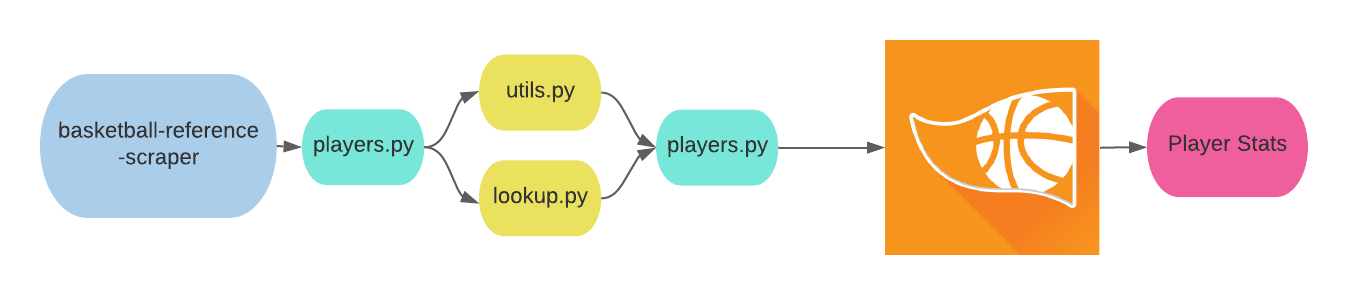

In [2]:
Image(filename='img/basketball_ref_scraper.png', width = 1200, height = 300) 

As a group, we applied for the Twitter API license to scrape data using Tweepy, a python-powered Twitter API. We obtained the latest up to 3000 tweets of the NBA players during 2017-2021 who have a Twitter account, along with their meta data such as name, screen name, followers, etc. Once we have the tweets, we then filter and classify the tweets into politcal or nonpolitical based on the methods described in the Data Cleaning section. Due to the Twitter API rate limit constraints, the entire scraping process would take more than 48 hours, so we omit that process here and simply include the scraped data.

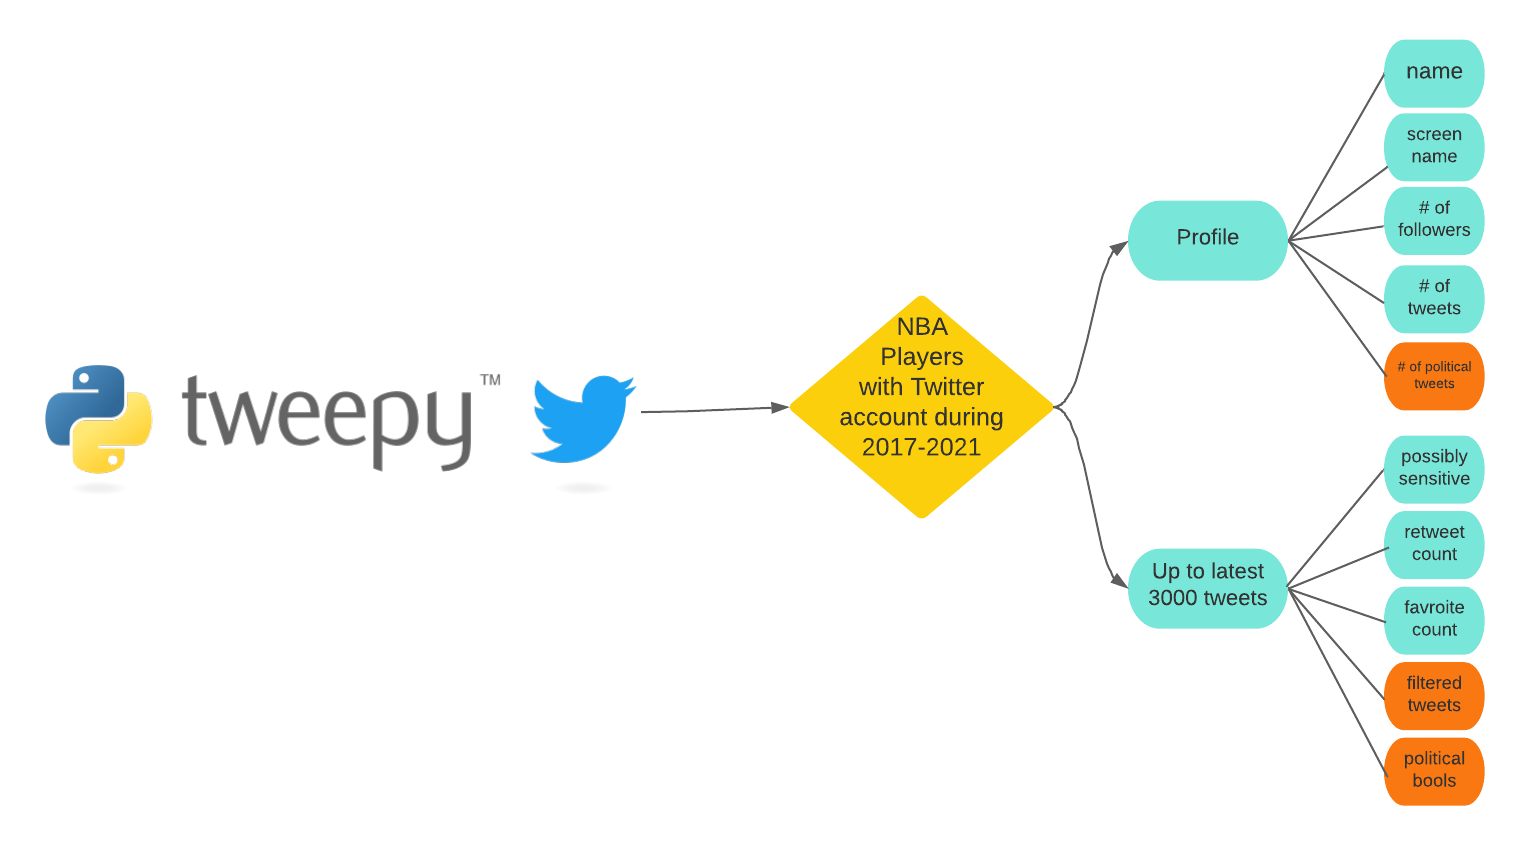

In [3]:
Image(filename='img/twitter_scraper.png', width = 1200, height = 300)

# Data Cleaning

## Salary, on-court performance
Load the player salary and on-court performance data from 2017-2018, 2018-2019, 2019-2020, and 2020 - 2021 season 

In [4]:
main_data = pd.read_csv('data/main_data.csv', index_col=0)
main_data.head()

,SEASON,AGE,TEAM,...,PTS,SALARY,NAME
7,2017-18,28.0,TOT,...,5.2,"$1,974,159",Luke Babbitt
8,2017-18,28.0,ATL,...,6.1,"$1,974,159",Luke Babbitt
9,2017-18,28.0,MIA,...,2.5,"$1,974,159",Luke Babbitt
7,2017-18,28.0,ATL,...,12.9,"$16,910,113",Kent Bazemore
8,2018-19,29.0,ATL,...,11.6,"$18,089,887",Kent Bazemore


In [5]:
# removes players with 5 or less games played in each season, weird variable types does not allow for .isin() method 
# there are strings, ints, and floats in column 'G', must be done for int, float, and str
main_data = main_data[main_data['G'] != '5']
main_data = main_data[main_data['G'] != '4']
main_data = main_data[main_data['G'] != '3']
main_data = main_data[main_data['G'] != '2']
main_data = main_data[main_data['G'] != '1']

main_data = main_data[main_data['G'] != 5]
main_data = main_data[main_data['G'] != 4]
main_data = main_data[main_data['G'] != 3]
main_data = main_data[main_data['G'] != 2]
main_data = main_data[main_data['G'] != 1]

main_data = main_data[main_data['G'] != 5.0]
main_data = main_data[main_data['G'] != 4.0]
main_data = main_data[main_data['G'] != 3.0]
main_data = main_data[main_data['G'] != 2.0]
main_data = main_data[main_data['G'] != 1.0]

main_data = main_data[main_data['G'] != '5.0']
main_data = main_data[main_data['G'] != '4.0']
main_data = main_data[main_data['G'] != '3.0']
main_data = main_data[main_data['G'] != '2.0']
main_data = main_data[main_data['G'] != '1.0']

main_data.reset_index(drop=True, inplace=True)

In [6]:
# if a player never shot a free throw, the free throw percentage is null, so need to fill percentage values with 0
main_data['FT%'] = main_data['FT%'].fillna(0)
main_data['2P%'] = main_data['2P%'].fillna(0)
main_data['3P%'] = main_data['3P%'].fillna(0)

In [7]:
main_data[main_data['POS'].isnull() == True]

,SEASON,AGE,TEAM,...,PTS,SALARY,NAME
982,2020-21,26.0,TOT,...,1.1,NaN,Sindarius Thornwell


In [8]:
# remove player Sindarius Thornwell, gets no minutes and has null position
main_data = main_data.drop(labels = 982, axis = 0)
main_data.reset_index(drop=True, inplace=True)

In [9]:
# splitting data by season
df_2017_stats = main_data[main_data['SEASON'] == '2017-18']
df_2018_stats = main_data[main_data['SEASON'] == '2018-19']
df_2019_stats = main_data[main_data['SEASON'] == '2019-20']
df_2020_stats = main_data[main_data['SEASON'] == '2020-21']

df_2017_stats.reset_index(drop=True,inplace=True)
df_2018_stats.reset_index(drop=True,inplace=True)
df_2019_stats.reset_index(drop=True,inplace=True)
df_2020_stats.reset_index(drop=True,inplace=True)

df_2017_stats = df_2017_stats.drop_duplicates(subset='NAME', keep='first')
df_2018_stats = df_2018_stats.drop_duplicates(subset='NAME', keep='first')
df_2019_stats = df_2019_stats.drop_duplicates(subset='NAME', keep='first')
df_2020_stats = df_2020_stats.drop_duplicates(subset='NAME', keep='first')

We needed to obtain the salaries of players in 2021 as they were not included in the player's salary table on their player page. The salaries_2021.csv file contains the current contracts of players in the NBA

In [10]:
# Need to get 2021 salaries as they are not included in the tables from basketball-reference
salaries_2021 = pd.read_csv('data/salaries_2021.csv', index_col=0)
salaries_2021.head()

,Rk,Player,Tm,...,2025-26,Signed Using,Guaranteed
0,1,Stephen Curry,GSW,...,NaN,Bird Rights,"$88,787,328"
1,2,Russell Westbrook,WAS,...,NaN,Bird Rights,"$85,569,960"
2,3,Chris Paul,PHO,...,NaN,Bird Rights,"$41,358,814"
3,4,John Wall,HOU,...,NaN,Bird Rights,"$85,565,760"
4,5,James Harden,BRK,...,NaN,Bird Rights,"$84,672,000"


In [11]:
salaries_2021.drop(salaries_2021[salaries_2021['2021-22'] == 'Salary'].index, inplace=True)
salaries_2021.drop(salaries_2021[salaries_2021['Rk'] == 'Rk'].index, inplace=True)
salaries_2021_only = salaries_2021.filter(['Player', '2020-21'])
salaries_2021_only.rename(columns={'2020-21' : 'SALARY', 'Player' : 'NAME'}, inplace=True)
salaries_2021_only.reset_index(drop=True, inplace=True)
salaries_2021_only.head()

,NAME,SALARY
0,Stephen Curry,"$43,006,362"
1,Russell Westbrook,"$41,358,814"
2,Chris Paul,"$41,358,814"
3,John Wall,"$41,254,920"
4,James Harden,"$40,824,000"


In [12]:
# combining salaries for season 2020-21
df_2020_stats = df_2020_stats.drop(columns='SALARY')
df_2020_stats = df_2020_stats.merge(salaries_2021_only, how='left', on='NAME')

In [13]:
# players with accents in name or do not work with scraper, data will need to be added manually
df_2020_stats[df_2020_stats.isnull().any(axis=1)][0:5]

,SEASON,AGE,TEAM,...,PTS,NAME,SALARY
5,2020-21,33.0,UTA,...,4.0,Ersan İlyasova,NaN
9,2020-21,27.0,LAL,...,15.5,Dennis Schröder,NaN
28,2020-21,28.0,CHI,...,1.0,Cristiano Felício,NaN
41,2020-21,26.0,NOP,...,7.0,Willy Hernangómez,NaN
67,2020-21,25.0,MIN,...,7.6,Juan Hernangómez,NaN


Exact salary data obtained from player pages on basketball-reference.com
If missing, assumed to be veteran minumum contract cost for that year

In [14]:
df_2019_stats.loc[16, 'SALARY'] = '$893,310'
df_2018_stats.loc[89, 'SALARY'] = '$838,464'
df_2020_stats.loc[5, 'SALARY'] = '$1,194,542'
df_2020_stats.loc[9, 'SALARY'] = '$15,500,000'
df_2020_stats.loc[28, 'SALARY'] = '$7,529,020'
df_2020_stats.loc[41, 'SALARY'] = '$1,727,145'
df_2020_stats.loc[67, 'SALARY'] = '$6,493,000'
df_2020_stats.loc[68, 'SALARY'] = '$28,542,009'
df_2020_stats.loc[86, 'SALARY'] = '$3,500,000'
df_2020_stats.loc[88, 'SALARY'] = '$893,310'
df_2020_stats.loc[105, 'SALARY'] = '$17,850,000'
df_2020_stats.loc[136, 'SALARY'] = '$18,000,000'
df_2020_stats.loc[171, 'SALARY'] = '$893,310'
df_2020_stats.loc[180, 'SALARY'] = '$29,467,800'
df_2020_stats.loc[183, 'SALARY'] = '$893,310'
df_2020_stats.loc[200, 'SALARY'] = '$26,000,000'
df_2020_stats.loc[206, 'SALARY'] = '$1,824,003'
df_2020_stats.loc[209, 'SALARY'] = '$8,333,333'
df_2020_stats.loc[225, 'SALARY'] = '$12,000,000'
df_2020_stats.loc[226, 'SALARY'] = '$18,000,000'
df_2020_stats.loc[237, 'SALARY'] = '$15,000,000'
df_2020_stats.loc[253, 'SALARY'] = '$15,000,000'
df_2020_stats.loc[269, 'SALARY'] = '$10,000,000'
df_2020_stats.loc[272, 'SALARY'] = '$893,310'
df_2020_stats.loc[278, 'SALARY'] = '$893,310'
df_2020_stats.loc[283, 'SALARY'] = '$893,310'
df_2020_stats.loc[285, 'SALARY'] = '$8,049,360'
df_2020_stats.loc[290, 'SALARY'] = '$893,310'
df_2020_stats.loc[293, 'SALARY'] = '$893,310'
df_2020_stats.loc[305, 'SALARY'] = '$250,000'
df_2020_stats.loc[309, 'SALARY'] = '$893,310'
df_2020_stats.loc[326, 'SALARY'] = '$893,310'
df_2020_stats.loc[332, 'SALARY'] = '$893,310'
df_2020_stats.loc[336, 'SALARY'] = '$893,310'
df_2020_stats.loc[339, 'SALARY'] = '$893,310'
df_2020_stats.loc[341, 'SALARY'] = '$893,310'
df_2020_stats.loc[342, 'SALARY'] = '$893,310'
df_2020_stats.loc[348, 'SALARY'] = '$893,310'
df_2020_stats.loc[349, 'SALARY'] = '$893,310'
df_2020_stats.loc[353, 'SALARY'] = '$893,310'
df_2020_stats.loc[354, 'SALARY'] = '$893,310'
df_2020_stats.loc[359, 'SALARY'] = '$1,517,981'
df_2020_stats.loc[360, 'SALARY'] = '$893,310'
df_2020_stats.loc[362, 'SALARY'] = '$893,310'
df_2020_stats.loc[363, 'SALARY'] = '$893,310'
df_2020_stats.loc[366, 'SALARY'] = '$893,310'
df_2020_stats.loc[375, 'SALARY'] = '$893,310'
df_2020_stats.loc[378, 'SALARY'] = '$4,097,561'
df_2020_stats.loc[383, 'SALARY'] = '$893,310'
df_2020_stats.loc[394, 'SALARY'] = '$893,310'
df_2020_stats.loc[399, 'SALARY'] = '$893,310'
df_2020_stats.loc[401, 'SALARY'] = '$893,310'
df_2020_stats.loc[405, 'SALARY'] = '$2,824,320'
df_2020_stats.loc[406, 'SALARY'] = '$893,310'
df_2020_stats.loc[411, 'SALARY'] = '$893,310'
df_2020_stats.loc[412, 'SALARY'] = '$893,310'
df_2020_stats.loc[416, 'SALARY'] = '$893,310'
df_2020_stats.loc[417, 'SALARY'] = '$893,310'

In [15]:
# Dropping players who no longer play in NBA (no stats recorded)
df_2017_stats = df_2017_stats.drop(labels=[647, 648, 649])
df_2018_stats = df_2018_stats.drop(labels=[300, 361, 567, 694])
df_2017_stats.reset_index(drop=True, inplace=True)
df_2018_stats.reset_index(drop=True, inplace=True)

In [16]:
def standardize_salary(input_str):
    try:
        string = input_str.strip()
        string = string.strip()
        string = string.replace('$', '')
        string = string.replace(',', '')
        string = string.replace('<', '')
        string = string.replace('(TW)', '')
        string = string.strip()
        string = string.replace('Minimum', '850000')
    except:
        return input_str
    return int(string)

def del_strs(x):
    try:
        return float(x)
    except:
        return np.nan

In [17]:
# Standardizing salaries and deleting nans
df_2017_stats['SALARY'] = df_2017_stats['SALARY'].apply(standardize_salary)
df_2018_stats['SALARY'] = df_2018_stats['SALARY'].apply(standardize_salary)
df_2019_stats['SALARY'] = df_2019_stats['SALARY'].apply(standardize_salary)
df_2020_stats['SALARY'] = df_2020_stats['SALARY'].apply(standardize_salary)
df_2017_stats.dropna(axis=0, subset=['PTS'], inplace=True, how='any')
df_2018_stats.dropna(axis=0, subset=['PTS'], inplace=True, how='any')
df_2019_stats.dropna(axis=0, subset=['PTS'], inplace=True, how='any')
df_2020_stats.dropna(axis=0, subset=['PTS'], inplace=True, how='any')
df_2017_stats.reset_index(drop=True,inplace=True)
df_2018_stats.reset_index(drop=True,inplace=True)
df_2019_stats.reset_index(drop=True,inplace=True)
df_2020_stats.reset_index(drop=True,inplace=True)

In [18]:
df_2017_stats = pd.read_csv('data/year_2017.csv')
df_2018_stats = pd.read_csv('data/year_2018.csv')
df_2019_stats = pd.read_csv('data/year_2019.csv')
df_2020_stats = pd.read_csv('data/year_2020.csv')

In [19]:
df_2017_stats = df_2017_stats.drop(['Unnamed: 0'], axis=1)
df_2018_stats = df_2018_stats.drop(['Unnamed: 0'], axis=1)
df_2019_stats = df_2019_stats.drop(['Unnamed: 0'], axis=1)
df_2020_stats = df_2020_stats.drop(['Unnamed: 0'], axis=1)

In [20]:
df_2017_stats

,SEASON,AGE,TEAM,...,PTS,SALARY,NAME
0,2017-18,28.0,TOT,...,5.2,1974159,Luke Babbitt
1,2017-18,28.0,ATL,...,12.9,16910113,Kent Bazemore
2,2017-18,31.0,TOT,...,12.1,6306060,Marco Belinelli
3,2017-18,23.0,ATL,...,5.2,1567200,DeAndre' Bembry
4,2017-18,23.0,ATL,...,4.7,729919,Tyler Cavanaugh
...,...,...,...,...,...,...,...
459,2017-18,29.0,WAS,...,8.8,1471382,Mike Scott
460,2017-18,31.0,WAS,...,3.4,5225000,Jason Smith
461,2017-18,27.0,WAS,...,19.4,18063850,John Wall
462,2017-18,25.0,NYK,...,17.5,16500000,Tim Hardaway Jr.


In [21]:
main_df = pd.concat([df_2017_stats, df_2018_stats, df_2019_stats, df_2020_stats], axis=0, sort=False)

In [22]:
main_df.head()

,SEASON,AGE,TEAM,...,PTS,SALARY,NAME
0,2017-18,28.0,TOT,...,5.2,1974159,Luke Babbitt
1,2017-18,28.0,ATL,...,12.9,16910113,Kent Bazemore
2,2017-18,31.0,TOT,...,12.1,6306060,Marco Belinelli
3,2017-18,23.0,ATL,...,5.2,1567200,DeAndre' Bembry
4,2017-18,23.0,ATL,...,4.7,729919,Tyler Cavanaugh


We have to get the salary of the NBA players during 2020-2021 season separately as they're not included in the 2020-2021 main dataset from basketball_reference.com

$EFF = PTS + REB + AST + STL + BLK - FG_{missed} - FT_{missed} - TOV$

In [23]:
def calc_eff(pts, reb, ast, stl, blk, fga, fg, fta, ft, tov):
    fg_missed = fga - fg
    ft_missed = fta - ft
    efficiency = pts + reb + ast + stl + blk - fg_missed - ft_missed - tov
    return efficiency

$ TS\% = \frac {PTS}{2 * (.44 * FT_{attempted}) + FG_{attempted}}$

In [24]:
def calc_true_shooting(pts, fga, fta):
    tsa = (.44*fta) + fga
    ts_percent = pts / (2*tsa)
    return ts_percent

In [25]:
# Calculates ratio of assists to turnovers
def calc_assist_tov_ratio(ast, tov):
    if tov == 0:
        tov = .1
    ast_rat = ast / tov
    return ast_rat

In [26]:
# Calculates player efficiency based on official formula
df_2017_stats['EFF'] = np.vectorize(calc_eff)(df_2017_stats['PTS'], df_2017_stats['TRB'],df_2017_stats['AST'],
                                   df_2017_stats['STL'], df_2017_stats['BLK'], df_2017_stats['FGA'],
                                   df_2017_stats['FG'], df_2017_stats['FTA'], df_2017_stats['FT'], 
                                   df_2017_stats['TOV'])
df_2018_stats['EFF'] = np.vectorize(calc_eff)(df_2018_stats['PTS'], df_2018_stats['TRB'],df_2018_stats['AST'],
                                   df_2018_stats['STL'], df_2018_stats['BLK'], df_2018_stats['FGA'],
                                   df_2018_stats['FG'], df_2018_stats['FTA'], df_2018_stats['FT'], 
                                   df_2018_stats['TOV'])
df_2019_stats['EFF'] = np.vectorize(calc_eff)(df_2019_stats['PTS'], df_2019_stats['TRB'],df_2019_stats['AST'],
                                   df_2019_stats['STL'], df_2019_stats['BLK'], df_2019_stats['FGA'],
                                   df_2019_stats['FG'], df_2019_stats['FTA'], df_2019_stats['FT'], 
                                   df_2019_stats['TOV'])
df_2020_stats['EFF'] = np.vectorize(calc_eff)(df_2020_stats['PTS'], df_2020_stats['TRB'],df_2020_stats['AST'],
                                   df_2020_stats['STL'], df_2020_stats['BLK'], df_2020_stats['FGA'],
                                   df_2020_stats['FG'], df_2020_stats['FTA'], df_2020_stats['FT'], 
                                   df_2020_stats['TOV'])
# Calculates True Shooting% based on official formula
df_2017_stats['TS_PC'] = np.vectorize(calc_true_shooting)(df_2017_stats['PTS'], df_2017_stats['FGA'], df_2017_stats['FTA'])
df_2018_stats['TS_PC'] = np.vectorize(calc_true_shooting)(df_2018_stats['PTS'], df_2018_stats['FGA'], df_2018_stats['FTA'])
df_2019_stats['TS_PC'] = np.vectorize(calc_true_shooting)(df_2019_stats['PTS'], df_2019_stats['FGA'], df_2019_stats['FTA'])
df_2020_stats['TS_PC'] = np.vectorize(calc_true_shooting)(df_2020_stats['PTS'], df_2020_stats['FGA'], df_2020_stats['FTA'])
# Calculates Assist - Turnover Ratio
df_2017_stats['AST_TOV_RATIO'] = np.vectorize(calc_assist_tov_ratio)(df_2017_stats['AST'], df_2017_stats['TOV'])
df_2018_stats['AST_TOV_RATIO'] = np.vectorize(calc_assist_tov_ratio)(df_2018_stats['AST'], df_2018_stats['TOV'])
df_2019_stats['AST_TOV_RATIO'] = np.vectorize(calc_assist_tov_ratio)(df_2019_stats['AST'], df_2019_stats['TOV'])
df_2020_stats['AST_TOV_RATIO'] = np.vectorize(calc_assist_tov_ratio)(df_2020_stats['AST'], df_2020_stats['TOV'])

In [27]:
df_2017_stats[df_2017_stats['EFF'] > 30]

,SEASON,AGE,TEAM,...,EFF,TS_PC,AST_TOV_RATIO
94,2017-18,33.0,CLE,...,32.7,0.620487,2.166667
178,2017-18,28.0,HOU,...,30.2,0.619296,2.000000
266,2017-18,27.0,NOP,...,30.1,0.583117,1.080000
267,2017-18,24.0,NOP,...,32.9,0.610339,1.045455
275,2017-18,23.0,MIL,...,30.8,0.599376,1.600000


Group the players by teams and append winning percentage of NBA teams

In [28]:
# Win Percentages for each year
standing_dict_2017 = {'ATL' : .293,'BOS' : .671,'BRK' : .341,'CHI' : .329, 'CHO' : .439,'CLE' : .610,'DAL' : .293,'DEN' : .561,
                     'DET' : .476,'GSW' : .707,'HOU' : .793,'IND' : .585, 'LAC' : .512,'LAL' : .427,'MEM' : .268, 'MIA' : .537,
                     'MIL' : .537,'MIN' : .573,'NOP' : .585,'NYK' : .354,'OKC' : .585,'ORL' : .305,'PHI' : .634, 'PHO' : .256,
                     'POR' : .598,'SAC' : .329,'SAS' : .573,'TOR' : .720,'UTA' : .585,'WAS' : .524}
standing_dict_2018 = {'ATL' : .354,'BOS' : .598,'BRK' : .512,'CHI' : .268, 'CHO' : .476,'CLE' : .232,'DAL' : .402,'DEN' : .659,
                     'DET' : .500,'GSW' : .695,'HOU' : .646,'IND' : .585, 'LAC' : .585,'LAL' : .451,'MEM' : .402, 'MIA' : .476,
                     'MIL' : .732,'MIN' : .439,'NOP' : .402,'NYK' : .207,'OKC' : .598,'ORL' : .512,'PHI' : .622, 'PHO' : .232,
                     'POR' : .646,'SAC' : .476,'SAS' : .585,'TOR' : .707,'UTA' : .610,'WAS' : .390}
standing_dict_2019 = {'ATL' : .299,'BOS' : .667,'BRK' : .486,'CHI' : .338, 'CHO' : .354,'CLE' : .292,'DAL' : .573,'DEN' : .630,
                     'DET' : .303,'GSW' : .231,'HOU' : .611,'IND' : .616, 'LAC' : .681,'LAL' : .732,'MEM' : .466, 'MIA' : .603,
                     'MIL' : .767,'MIN' : .297,'NOP' : .417,'NYK' : .318,'OKC' : .611,'ORL' : .452,'PHI' : .589, 'PHO' : .466,
                     'POR' : .473,'SAC' : .431,'SAS' : .451,'TOR' : .736,'UTA' : .611,'WAS' : .347}
standing_dict_2020 = {'ATL' : .569,'BOS' : .500,'BRK' : .667,'CHI' : .431, 'CHO' : .458,'CLE' : .306,'DAL' : .583,'DEN' : .653,
                     'DET' : .278,'GSW' : .542,'HOU' : .236,'IND' : .472, 'LAC' : .653,'LAL' : .583,'MEM' : .528, 'MIA' : .556,
                     'MIL' : .639,'MIN' : .319,'NOP' : .431,'NYK' : .569,'OKC' : .306,'ORL' : .292,'PHI' : .681, 'PHO' : .708,
                     'POR' : .583,'SAC' : .431,'SAS' : .458,'TOR' : .375,'UTA' : .722,'WAS' : .472}

In [29]:
# Adds TEAM_WIN_PC column to all year DataFrames
df_2017_stats['TEAM_WIN_PC'] = np.nan
for index, row in df_2017_stats.iterrows():
    row = row.copy()
    if(row['TEAM'] != 'TOT'):
        row['TEAM_WIN_PC'] = standing_dict_2017[row['TEAM']]
    df_2017_stats.iloc[index] = row
    
df_2018_stats['TEAM_WIN_PC'] = np.nan
for index, row in df_2018_stats.iterrows():
    row = row.copy()
    if(row['TEAM'] != 'TOT'):
        row['TEAM_WIN_PC'] = standing_dict_2018[row['TEAM']]
    df_2018_stats.iloc[index] = row
    
df_2019_stats['TEAM_WIN_PC'] = np.nan
for index, row in df_2019_stats.iterrows():
    row = row.copy()
    if(row['TEAM'] != 'TOT'):
        row['TEAM_WIN_PC'] = standing_dict_2019[row['TEAM']]
    df_2019_stats.iloc[index] = row
    

df_2020_stats['TEAM_WIN_PC'] = np.nan
for index, row in df_2020_stats.iterrows():
    row = row.copy()
    if(row['TEAM'] != 'TOT'):
        row['TEAM_WIN_PC'] = standing_dict_2020[row['TEAM']]
    df_2020_stats.iloc[index] = row

In [30]:
df_list = [df_2017_stats, df_2018_stats, df_2019_stats, df_2020_stats]
true_shooting_dict_2017 = {}
true_shooting_dict_2018 = {}
true_shooting_dict_2019 = {}
true_shooting_dict_2020 = {}
counter = 0
for df in df_list:
    # Groups data by team, gets mean shooting percentage for players of each team
    df = df.groupby('TEAM').mean()
    df['TEAM'] = df.index
    df = df[['TEAM', 'TS_PC']]
    TS_PC = df.to_dict('split')
    TS_PC.pop('index', None)
    counter += 1
    for team in TS_PC['data']:
        if counter == 1:
            true_shooting_dict_2017[team[0]] = team[1]
        elif counter == 2:
            true_shooting_dict_2018[team[0]] = team[1]
        elif counter == 3:
            true_shooting_dict_2019[team[0]] = team[1]
        elif counter == 4:
            true_shooting_dict_2020[team[0]] = team[1]

In [31]:
df_list = [df_2017_stats, df_2018_stats, df_2019_stats, df_2020_stats]
ast_tov_ratio_dict_2017 = {}
ast_tov_ratio_dict_2018 = {}
ast_tov_ratio_dict_2019 = {}
ast_tov_ratio_dict_2020 = {}
counter = 0
for df in df_list:
    # Groups data by team, gets mean ast tov ratio for players of each team
    df = df.groupby('TEAM').mean()
    df['TEAM'] = df.index
    df = df[['TEAM', 'TS_PC']]
    TS_PC = df.to_dict('split')
    TS_PC.pop('index', None)
    counter += 1
    for team in TS_PC['data']:
        if counter == 1:
            ast_tov_ratio_dict_2017[team[0]] = team[1]
        elif counter == 2:
            ast_tov_ratio_dict_2018[team[0]] = team[1]
        elif counter == 3:
            ast_tov_ratio_dict_2019[team[0]] = team[1]
        elif counter == 4:
            ast_tov_ratio_dict_2020[team[0]] = team[1]

## Load labeled tweets
Once we've figured out the hyperparameters for our model through the gridsearch, we're ready to label our data. Load the last up to 3000 labeled tweets of all the NBA players from 2017-2018, 2018-2019, 2019-2020, and 2020 - 2021 season. The way we construct our model for labeling tweets as political or non-political is explained in the *Labeling tweets from Twitter* section

In [32]:
twitter_df_test1 = pd.read_pickle('data/twitter_political_1.pkl')
twitter_df_test2 = pd.read_pickle('data/twitter_political_2.pkl')
twitter_df_test3 = pd.read_pickle('data/twitter_political_3.pkl')
twitter_df_test4 = pd.read_pickle('data/twitter_political_4.pkl')

In [33]:
twitter_df = pd.concat([twitter_df_test1, twitter_df_test2, twitter_df_test3, twitter_df_test4], axis=0)

In [34]:
twitter_df.head()

,name,screen_name,followers_count,...,filtered_tweets,political_bools,num_political
0,Álex Abrines,alexabrines,54283.0,...,"[[bertranx, ganchetto, kaskycascant, bueno, ,,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",27
1,Quincy Acy,QuincyAcy,33445.0,...,"[[ballislif, :, nba, need, player, think, like...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...",141
2,Jaylen Adams,10jadams,4870.0,...,"[[complexmus, :, real, back, ., j., cole, ., t...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",84
3,Steven Adams,RealStevenAdams,216669.0,...,"[[stationcdrkelli, :, everi, day, earthday, ev...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",51
4,Bam Adebayo,Bam1of1,180603.0,...,"[[sad, bro, ...., dwyanewad, spidadmitchel, ht...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",70


In [35]:
def convert_rt(text_arr):
    retweet = np.zeros(len(text_arr))
    for i in range(len(text_arr)):
        if str(text_arr[i]).startswith('RT', 0, 2):
            retweet[i] = 1
    return retweet.astype(int)

In [36]:
twitter_df['retweeted'] = twitter_df['full_text'].apply(lambda x: convert_rt(x))

In [37]:
twitter_df[['full_text', 'created_at', 'favorite_count', 'retweet_count', 'retweeted', 'id', 'possibly_sensitive']].iloc[0].apply(lambda x: len(x))

full_text             3000
created_at            3000
favorite_count        3000
retweet_count         3000
retweeted             3000
id                    3000
possibly_sensitive    3000
Name: 0, dtype: int64

In [38]:
twitter_df.dtypes

name                               object
screen_name                        object
followers_count                   float64
statuses_count                    float64
account_created_at    datetime64[ns, UTC]
full_text                          object
created_at                         object
favorite_count                     object
retweet_count                      object
retweeted                          object
id                                 object
possibly_sensitive                 object
filtered_tweets                    object
political_bools                    object
num_political                       int64
dtype: object

Since we cannot get the exact period for players that played for multiple teams during a single season, we'll drop them for our analysis. This should only remove a small portion of our data as it is rather uncommon in NBA

In [39]:
df_by_season = []
seasons = ['2017-18', '2018-19', '2019-20', '2020-21']
for season in seasons:
    df_original = main_df[main_df['SEASON'] == season].sort_values(by='NAME').reset_index(drop=True)
    df = df_original.drop_duplicates(subset='NAME', keep=False)
    loss_percentage = ((len(df_original) - len(df)) / len(df)) * 100
    print("data lost in %s: %.3f %%" % (season, loss_percentage))
    df_by_season.append(df)
df_stats = pd.concat(df_by_season, axis=0)
df_stats.reset_index(drop=True, inplace=True)
df_stats

data lost in 2017-18: 0.000 %
data lost in 2018-19: 0.000 %
data lost in 2019-20: 0.000 %
data lost in 2020-21: 11.671 %


,SEASON,AGE,TEAM,...,PTS,SALARY,NAME
0,2017-18,33.0,MIN,...,2.3,1471382,Aaron Brooks
1,2017-18,22.0,ORL,...,17.6,5504420,Aaron Gordon
2,2017-18,23.0,DAL,...,6.7,174571,Aaron Harrison
3,2017-18,24.0,BOS,...,3.0,1167333,Abdel Nader
4,2017-18,31.0,BOS,...,12.9,27734405,Al Horford
...,...,...,...,...,...,...,...
1759,2020-21,27.0,DAL,...,5.3,4000000,Willie Cauley-Stein
1760,2020-21,26.0,NOP,...,7.0,1727145,Willy Hernangómez
1761,2020-21,26.0,TOR,...,4.2,321893,Yuta Watanabe
1762,2020-21,25.0,CHI,...,27.5,19500000,Zach LaVine


In [40]:
import pytz
timezone = pytz.timezone('UTC')
season_duration = {
    '2017-18': [datetime.datetime(2017, 10, 17, tzinfo=timezone), datetime.datetime(2018, 4, 11, tzinfo=timezone)],
    '2018-19': [datetime.datetime(2018, 10, 16, tzinfo=timezone), datetime.datetime(2019, 4, 10, tzinfo=timezone)],
    '2019-20': [datetime.datetime(2019, 10, 22, tzinfo=timezone), datetime.datetime(2020, 4, 15, tzinfo=timezone)],
    '2020-21': [datetime.datetime(2020, 12, 22, tzinfo=timezone), datetime.datetime(2021, 5, 16, tzinfo=timezone)]
}

In [41]:
def select_year(year):
    # return the index 0 for season 2017-18, 1 for 2018-19, ... 3 for 2020-21, -1 if not found
    season = 0 # 0 corresponds to 2017
    for begin, end in season_duration.values():
        if begin < year and year < end:
            return season
        else:
            season += 1
    return -1

In [42]:
tweet_dict = {'political_proportion_by_year': [],
              'political_retweet_proportion_by_year': [],
              'political_favorite_proportion_by_year': []}
df = twitter_df
# to not divide by 0
epsilon = 10e-6 
for idx, row in df.iterrows():
    political_tweet_total = np.zeros(len(seasons))
    tweet_total = np.zeros(len(seasons))
    
    political_retweet_total = np.zeros(len(seasons)) + epsilon
    nonpolitical_retweet_total = np.zeros(len(seasons)) + epsilon
    political_retweet_count_total = np.zeros(len(seasons))
    nonpolitical_retweet_count_total = np.zeros(len(seasons))
    
    political_favorite_total = np.zeros(len(seasons)) + epsilon
    nonpolitical_favorite_total = np.zeros(len(seasons)) + epsilon
    political_favorite_count_total = np.zeros(len(seasons))
    nonpolitical_favorite_count_total = np.zeros(len(seasons))
    
    for j, date in enumerate(row['created_at']):
        if isinstance(date, datetime.datetime):
            year = select_year(date)
            if year == -1:
                continue
            if row['political_bools'][j] == 1:
                political_tweet_total[year] += 1
                
                political_retweet_total[year] += 1
                political_retweet_count_total[year] += row['retweet_count'][j]
                
                # favorite count for retweet is always 0, so we don't include it
                if row['retweeted'][j] == 0:
                    political_favorite_total[year] += 1
                    political_favorite_count_total[year] += row['favorite_count'][j]
            else:
                nonpolitical_retweet_total[year] += 1
                nonpolitical_retweet_count_total[year] += row['retweet_count'][j]
            
                if row['retweeted'][j] == 0:
                    nonpolitical_favorite_total[year] += 1
                    nonpolitical_favorite_count_total[year] += row['favorite_count'][j]
            tweet_total[year] += 1
    
    political_proportion = political_tweet_total / tweet_total
    political_retweet_proportion = (political_retweet_count_total / political_retweet_total) + (nonpolitical_retweet_count_total / nonpolitical_retweet_total)
    political_retweet_proportion = (political_retweet_count_total / political_retweet_total) / political_retweet_proportion
    political_favorite_proportion = (political_favorite_count_total / political_favorite_total) + (nonpolitical_favorite_count_total / nonpolitical_favorite_total)
    political_favorite_proportion = (political_favorite_count_total / political_favorite_total) / political_favorite_proportion
    tweet_dict['political_proportion_by_year'].append(political_proportion.astype(np.float).tolist())
    tweet_dict['political_retweet_proportion_by_year'].append(political_retweet_proportion.astype(np.float).tolist())
    tweet_dict['political_favorite_proportion_by_year'].append(political_favorite_proportion.astype(np.float).tolist())

In [43]:
for key in tweet_dict.keys():
    tweet_dict[key] = np.array(tweet_dict[key])

In [44]:
df_2017 = pd.DataFrame([tweet_dict['political_proportion_by_year'][:, 0], 
                       tweet_dict['political_retweet_proportion_by_year'][:, 0],
                       tweet_dict['political_favorite_proportion_by_year'][:, 0]]
                      ).T
df_2018 = pd.DataFrame([tweet_dict['political_proportion_by_year'][:, 1], 
                       tweet_dict['political_retweet_proportion_by_year'][:, 1],
                       tweet_dict['political_favorite_proportion_by_year'][:, 1]]
                      ).T
df_2019 = pd.DataFrame([tweet_dict['political_proportion_by_year'][:, 2], 
                       tweet_dict['political_retweet_proportion_by_year'][:, 2],
                       tweet_dict['political_favorite_proportion_by_year'][:, 2]]
                      ).T
df_2020 = pd.DataFrame([tweet_dict['political_proportion_by_year'][:, 3], 
                       tweet_dict['political_retweet_proportion_by_year'][:, 3],
                       tweet_dict['political_favorite_proportion_by_year'][:, 3]]
                      ).T

In [45]:
df_2017.columns = tweet_dict.keys()
df_2018.columns = tweet_dict.keys()
df_2019.columns = tweet_dict.keys()
df_2020.columns = tweet_dict.keys()

df_2017.insert(0, 'name', twitter_df['name'])
df_2018.insert(0, 'name', twitter_df['name'])
df_2019.insert(0, 'name', twitter_df['name'])
df_2020.insert(0, 'name', twitter_df['name'])

In [46]:
df_2017 = df_2017.dropna(axis=0).reset_index(drop=True)
df_2018 = df_2018.dropna(axis=0).reset_index(drop=True)
df_2019 = df_2019.dropna(axis=0).reset_index(drop=True)
df_2020 = df_2020.dropna(axis=0).reset_index(drop=True)

In [47]:
df_2017_stats = pd.merge(df_2017, df_2017_stats, how='inner', left_on='name', right_on='NAME').drop(columns=['NAME'])
df_2018_stats = pd.merge(df_2018, df_2018_stats, how='inner', left_on='name', right_on='NAME').drop(columns=['NAME'])
df_2019_stats = pd.merge(df_2018, df_2019_stats, how='inner', left_on='name', right_on='NAME').drop(columns=['NAME'])
df_2020_stats = pd.merge(df_2018, df_2020_stats, how='inner', left_on='name', right_on='NAME').drop(columns=['NAME'])

In [48]:
df_2017_stats.head()

,name,political_proportion_by_year,political_retweet_proportion_by_year,...,TS_PC,AST_TOV_RATIO,TEAM_WIN_PC
0,Álex Abrines,0.014493,0.115234,...,0.564361,1.333333,0.585
1,Quincy Acy,0.023392,0.052888,...,0.527162,0.888889,0.341
2,Steven Adams,0.054545,0.564917,...,0.627710,0.705882,0.585
3,Bam Adebayo,0.011905,0.978797,...,0.570814,1.500000,0.537
4,Cole Aldrich,0.038462,0.269644,...,0.360577,1.000000,0.573


## Labeling tweets from Twitter
Here we showcase the way we evaluate the performance of our algorithm for classififying political v.s. non-political tweets through 1000 manually labeled Tweets

We wanted to see if we could improve our data by using a form of sentiment analysis to help in the classification process of our Tweets.

In [49]:
# Defines tweets as political or non-political
def political_bools(list_in, positive):
    political_words_list = ['justice', 'political', 'blacklivesmatter', 'alllivesmatter', 'whitelivesmatter', 'bluelivesmatter', 'accountability', 'leftwing', 'rightwing', 'extremist', 'police-brutality', 'policereform',
'george-perry-floyd', 'minneapolis', 'derekchauvin', 'thomaslane', 'kueng', 'tou-thao', 'breonnataylor', 'bretthankison', 'mylescosgrove', 'joshuajaynes', 'elijahmcclain', 'nathanwoodyard', 'jasonrosenblatt',
'randyroedema', 'ahmaudarbery', 'gregorymcmichael', 'travismcmichael', 'williambryan', 'trayvonmartin', 'georgezimmerman', 'patriot', 'icantbreathe', 'saytheirname', 'sayhername', 'sayhisname', 'equality', 'equity',
'discrimination', 'killing', 'murder', 'assassination', 'mental-health', 'racial-profiling', 'stereotypes', 'racist', 'arrest', 'warrant', 'unfair', 'trump', 'biden', 'america', 'amerikkka',
'united-states', 'agenda', 'privilege', 'immunity', 'malfeasance', 'irresponsible', 'integrity', 'infringement', 'civil', 'violation', 'impunity', 'illegal', 'expose', 'dictatorship', 'authoritarian',
'corruption',  'allegation', 'law', 'illegal', 'congress', 'courts', 'trial', 'progressive', 'liberal', 'conservative', 'democrat', 'republican', 'democracy', 'snowflake', 'bootlicker', 'activism', 'protest', 'country', 
'social-justice', 'partisan', 'ideology', 'political', 'oppression', 'leadership', 'anarchy', 'conflict', 'establishment', 'derekchauvin', 'thomas-lane', 'guilty', 'innocent', 'debate', 'coronavirus', 'corona', 'covid',
'covid-19', 'chinese-virus', 'kung-flu', 'pandemic', 'hoax', 'covidiot', 'quarantine', 'mask', 'social-distance', 'lie', 'freedom', 'media', 'press', 'juneteenth', 'unconstitutional', 'empower', 'revolution', 'fascist', 'police',
'cops', 'pigs', 'force', 'terrorism', 'platform', 'power', 'crime', 'criminal-justice-system', 'communist', 'capitalist', 'liberties', 'abuse', 'poc', 'polarization', 'protect', 'violence', 'police', 'brutality', 'breonna', 'violate'
'violation', 'murdered', 'freedom', 'anti-mask', 'antimask', 'vaccine', 'vaccination', 'chauvin', 'government', 'govern', 'alleged', 'zimmerman', 'attack', 'slavery', 'segregated', 'segregation','Crow','brainwash',
'tyranny', 'CDC', 'president', 'totalitarian', 'woke', 'staywoke', 'power', 'fight', 'troops', 'diversity', 'allocate', 'refugee', 'masculinity', 'toxic', 'rape', 'immigration', 'society', 'corp', 'corporation', 'masculine', 'displaced', 'desiccation'
                           'repatriation', 'oppresive', 'administration', 'resettlement', 'defund', 'rayshard', 'resigned', 'resign', 'rittenhouse', 'kenosha', 'civility', 'presidential', 'capitol', 'riot', 'indigenous', 'arrested', 'privilege', 
                           'felony', 'weapon', 'war', 'siege', 'presidency', 'suppress', 'suppression', 'senator', 'congrssmen', 'reform', 'obama', 'michelleobama', 'barackobama', 'stopasianhate', 'stereotype', 'potus', 'clemency',
                           'justiceforbreonnataylor', 'justiceforgeorgefloyd', 'finance', 'financial', 'literacy', 'accountable', 'blackhistorymonth', 'sexuality', 'pridemonth', 'assault', 'officer', 'kneel', 'pledge', 'allegiance', 'womenshistorymonth',
                           'forthepeopleact', 'awareness', 'educate', 'education', 'israel', 'ramadan', 'eidmubarak', 'gaza', 'palestine', 'trayvon']
    
    political_stems = []
    analyser = SentimentIntensityAnalyzer()
    stemmer = SnowballStemmer('english')
    political_tweets_bool = []
    need_append = False
    for word in political_words_list:
        political_stems.append(stemmer.stem(word))
        political_tweets = []
    for i in range(0, len(list_in)):
        need_append = False
        if analyser.polarity_scores(' '.join(list_in[i]))['pos'] < positive:
            for token in list_in[i]:
                if token in political_stems:
                    need_append = True
        if need_append:
            political_tweets_bool.append(1)
        else:
            political_tweets_bool.append(0)
    return political_tweets_bool

In [50]:
# 1000 manually labeled Tweets as political or nonpolitical
twitter_labeled = pd.read_csv('data/labeled_tweets.csv', index_col=0)

In [51]:
y_true = pd.concat([twitter_labeled['Jamal Crawford'], twitter_labeled['Wenyen Gabriel'], twitter_labeled['Marquese Chriss'], 
                   twitter_labeled['Harrison Barnes'], twitter_labeled['Solomon Hill'], twitter_labeled['Garrett Temple'], 
                   twitter_labeled['Enes Kanter'], twitter_labeled['Ekpe Udoh'], twitter_labeled['Evan Turner'], 
                   twitter_labeled['Chris Paul'], twitter_labeled['Tobias Harris'], twitter_labeled['Carmelo Anthony'], 
                   twitter_labeled['LeBron James']])
y_true = list(y_true)

In [52]:
index_list = [158, 226, 131, 35, 292, 608, 356, 628, 626, 512, 270, 22, 330]
y_pred = []
for index in index_list:
    curr_100 = twitter_df['filtered_tweets'].iloc[index][0:100]
    curr_bools = political_bools(curr_100, .44)

    y_pred += curr_bools
confuse_matrix = confusion_matrix(y_true, y_pred)

target_names = ['Non-Political', 'Political']

In [53]:
# tests limit of sentiment analysis
def test_input_pos(input_nums):
    index_list = [158, 226, 131, 35, 292, 608, 356, 628, 626, 512, 270, 22, 330]
    f1_scores = []
    for num in input_nums:
        y_pred = []
        for index in index_list:
            curr_100 = twitter_df['filtered_tweets'].iloc[index][0:100]
            curr_bools = political_bools(curr_100, num)
            y_pred += curr_bools
        f1_scores.append(f1_score(y_true, y_pred))
    f1_dict = {input_nums[i]: f1_scores[i] for i in range(len(input_nums))}
    return f1_dict

 We found that putting a limit on the positive sentiment of the Tweet could give us a higher f1_score than without using any seniment analysis.

In [54]:
input_nums = [1, .425, .43, .435, .44, .445, .45, .455, .46, .465, .47, .475, .48, .485, .49, .495, .5, .505, .51, .515, .52]
test_input_pos(input_nums)

{1: 0.7113702623906706,
 0.425: 0.7121661721068249,
 0.43: 0.7159763313609468,
 0.435: 0.7159763313609468,
 0.44: 0.7159763313609468,
 0.445: 0.7159763313609468,
 0.45: 0.7138643067846608,
 0.455: 0.7138643067846608,
 0.46: 0.7138643067846608,
 0.465: 0.7138643067846608,
 0.47: 0.7117647058823529,
 0.475: 0.7117647058823529,
 0.48: 0.7117647058823529,
 0.485: 0.7117647058823529,
 0.49: 0.7117647058823529,
 0.495: 0.7117647058823529,
 0.5: 0.7117647058823529,
 0.505: 0.7117647058823529,
 0.51: 0.7117647058823529,
 0.515: 0.7096774193548389,
 0.52: 0.7096774193548389}

 Throughout testing different limits on the sentiment we found that a positive sentiment of .44 was an optimal limit. The following figure is the confusion matrix of the results compared to our manually labeled data. 

f1_score: 0.716


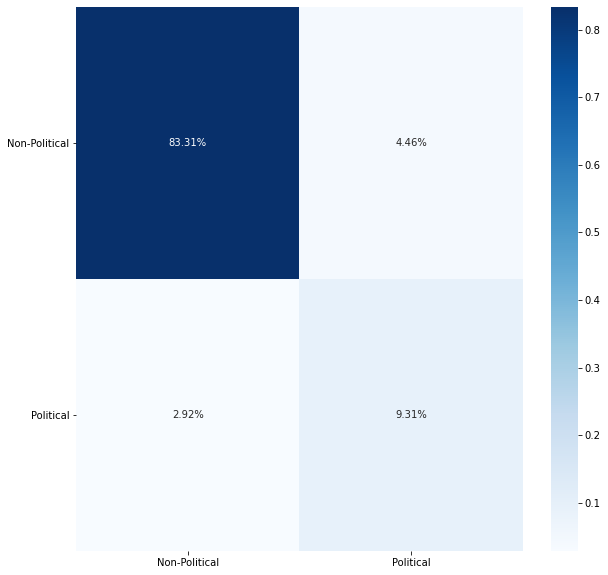

In [55]:
plt.figure(figsize=(10, 10))
print("f1_score: %.3f" % f1_score(y_true, y_pred))
ax = sns.heatmap(confuse_matrix/np.sum(confuse_matrix), cmap='Blues', annot=True, fmt='.2%')
ax.set_xticklabels(target_names)
ax.set_yticklabels(target_names)
plt.yticks(fontsize=10, rotation=0)
plt.xticks(fontsize=10, rotation=0);

# Data Analysis

## 2020 Spike Analysis
As 2020 is a time period of heightened political climate, we wonder if the way we classify the tweets can reflect this social movement. 

We first look at the Top 3 Earning Players from 2020 during the period of  2017-2021

In [56]:
top_three_earning_2020 = df_2020_stats.sort_values(by='SALARY', ascending=False).nlargest(3, 'SALARY')
top_three_earning_2020

,name,political_proportion_by_year,political_retweet_proportion_by_year,...,TS_PC,AST_TOV_RATIO,TEAM_WIN_PC
79,Stephen Curry,0.042857,0.254114,...,0.656688,1.676471,0.542
316,Russell Westbrook,0.009709,0.504592,...,0.508640,2.306122,0.472
252,Chris Paul,0.034188,0.187768,...,0.593668,4.000000,0.708


In [57]:
names = top_three_earning_2020['name'].values.tolist()
df = twitter_df[(twitter_df['name'] == names[0]) | (twitter_df['name'] == names[1]) | (twitter_df['name'] == names[2])].reset_index(drop=True)
df = df.dropna(axis=0)

In [58]:
tweet_dict = {'tweet_by_year': []}
years = [2017, 2018, 2019, 2020, 2021]
for idx, row in df.iterrows():
    temp = np.zeros(len(years))
    for j, date in enumerate(row['created_at']):
        if row['political_bools'][j] == 0:
            continue
        if date.year in years:
            temp[date.year - 2017] += 1
    tweet_dict['tweet_by_year'].append(temp.astype(np.int).tolist())

In [59]:
tweet_by_year_df = pd.DataFrame(tweet_dict['tweet_by_year'])
tweet_by_year_df.columns = years
df = pd.concat([df, tweet_by_year_df], axis=1)

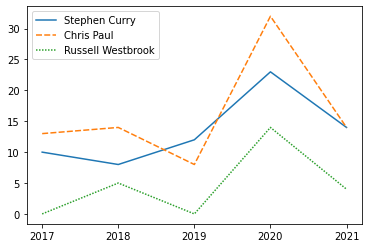

In [60]:
sns.lineplot(data=df[[2017, 2018, 2019, 2020, 2021]].T);
plt.xticks(np.arange(2017, 2022, 1));
plt.legend(df['name'].values);

Amongst the top 3 earning players by salary, we see a political tweet spike of at least double for each player in the year 2020. This is reasonable considering the amount of political events that took place such as the Black Lives Matter Movement, the presidential election, and the staggering amount of police brutality.

### Average Number of Favorites for Political and Non-Political Tweets during the years 2017-2021


In [61]:
tweet_dict = {'political': [], 'nonpolitical': []}
years = [2017, 2018, 2019, 2020, 2021]
for idx, row in df.iterrows():
    political = np.zeros(len(years))
    nonpolitical = np.zeros(len(years))
    
    for j, date in enumerate(row['created_at']):
        if isinstance(date, datetime.datetime) and date.year in years:
            if row['political_bools'][j] == 0:
                nonpolitical[date.year - 2017] += row['favorite_count'][j]
            else:
                political[date.year - 2017] += row['favorite_count'][j]
    tweet_dict['political'].append(political.astype(np.int).tolist())
    tweet_dict['nonpolitical'].append(nonpolitical.astype(np.int).tolist())


In [62]:
df_political = pd.DataFrame(pd.DataFrame(tweet_dict['political']).sum(axis=0))
df_nonpolitical = pd.DataFrame(pd.DataFrame(tweet_dict['nonpolitical']).sum(axis=0))
df = pd.concat([df_political, df_nonpolitical], axis=1)
df.columns = ['political', 'nonpolitical']
df.index = years

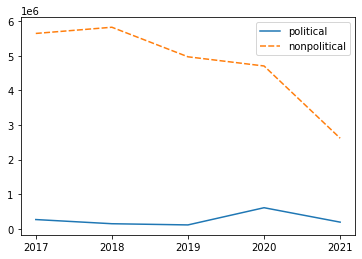

In [63]:
sns.lineplot(data=df);
plt.xticks(np.arange(2017, 2022, 1));

While there was a spike in favorites for political tweets in 2020, non-political tweets are a lot more popular than political ones throughout the entire 4 year period. This further proves that while political tweets may have some influence, the general consensus is that they are not well-received from fans. 


## Topic Models

In order to get an understanding of the context of NBA players' political tweets, we chose to do topic models on the players who had the highest number of political tweets - barring retirees David West and Ekpe Udoh - and LeBron James because he is arguably the most recognizable political advocate in the NBA. In order to do the topic models, we subset each player's political tweets, preprocess all the tweet text, and then fit an LDA model to visualize the most salient words in each player's entire set of political tweets and the most salient terms in 10 topics that were found in each player's tweets. We chose to use 10 topics in order to try to find unique political topics among the tweets such as police brutality, the 2020 election, voter suppression, COVID-19, prison reform, racism, media, etc. We also created word clouds for each of these players to see which words were most common in the players' tweets.

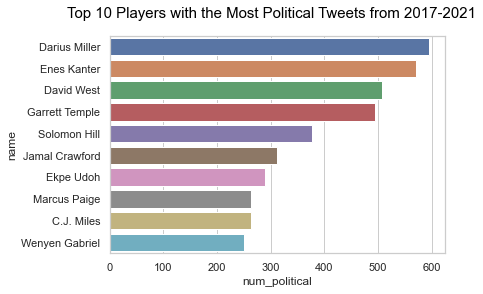

In [64]:
fig = plt.figure() 
fig.suptitle('Top 10 Players with the Most Political Tweets from 2017-2021', fontsize=15)
top_10 = twitter_df.sort_values(by = 'num_political', ascending=False).nlargest(10, 'num_political').reset_index(drop=True)
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'num_political', y = 'name', data = top_10);

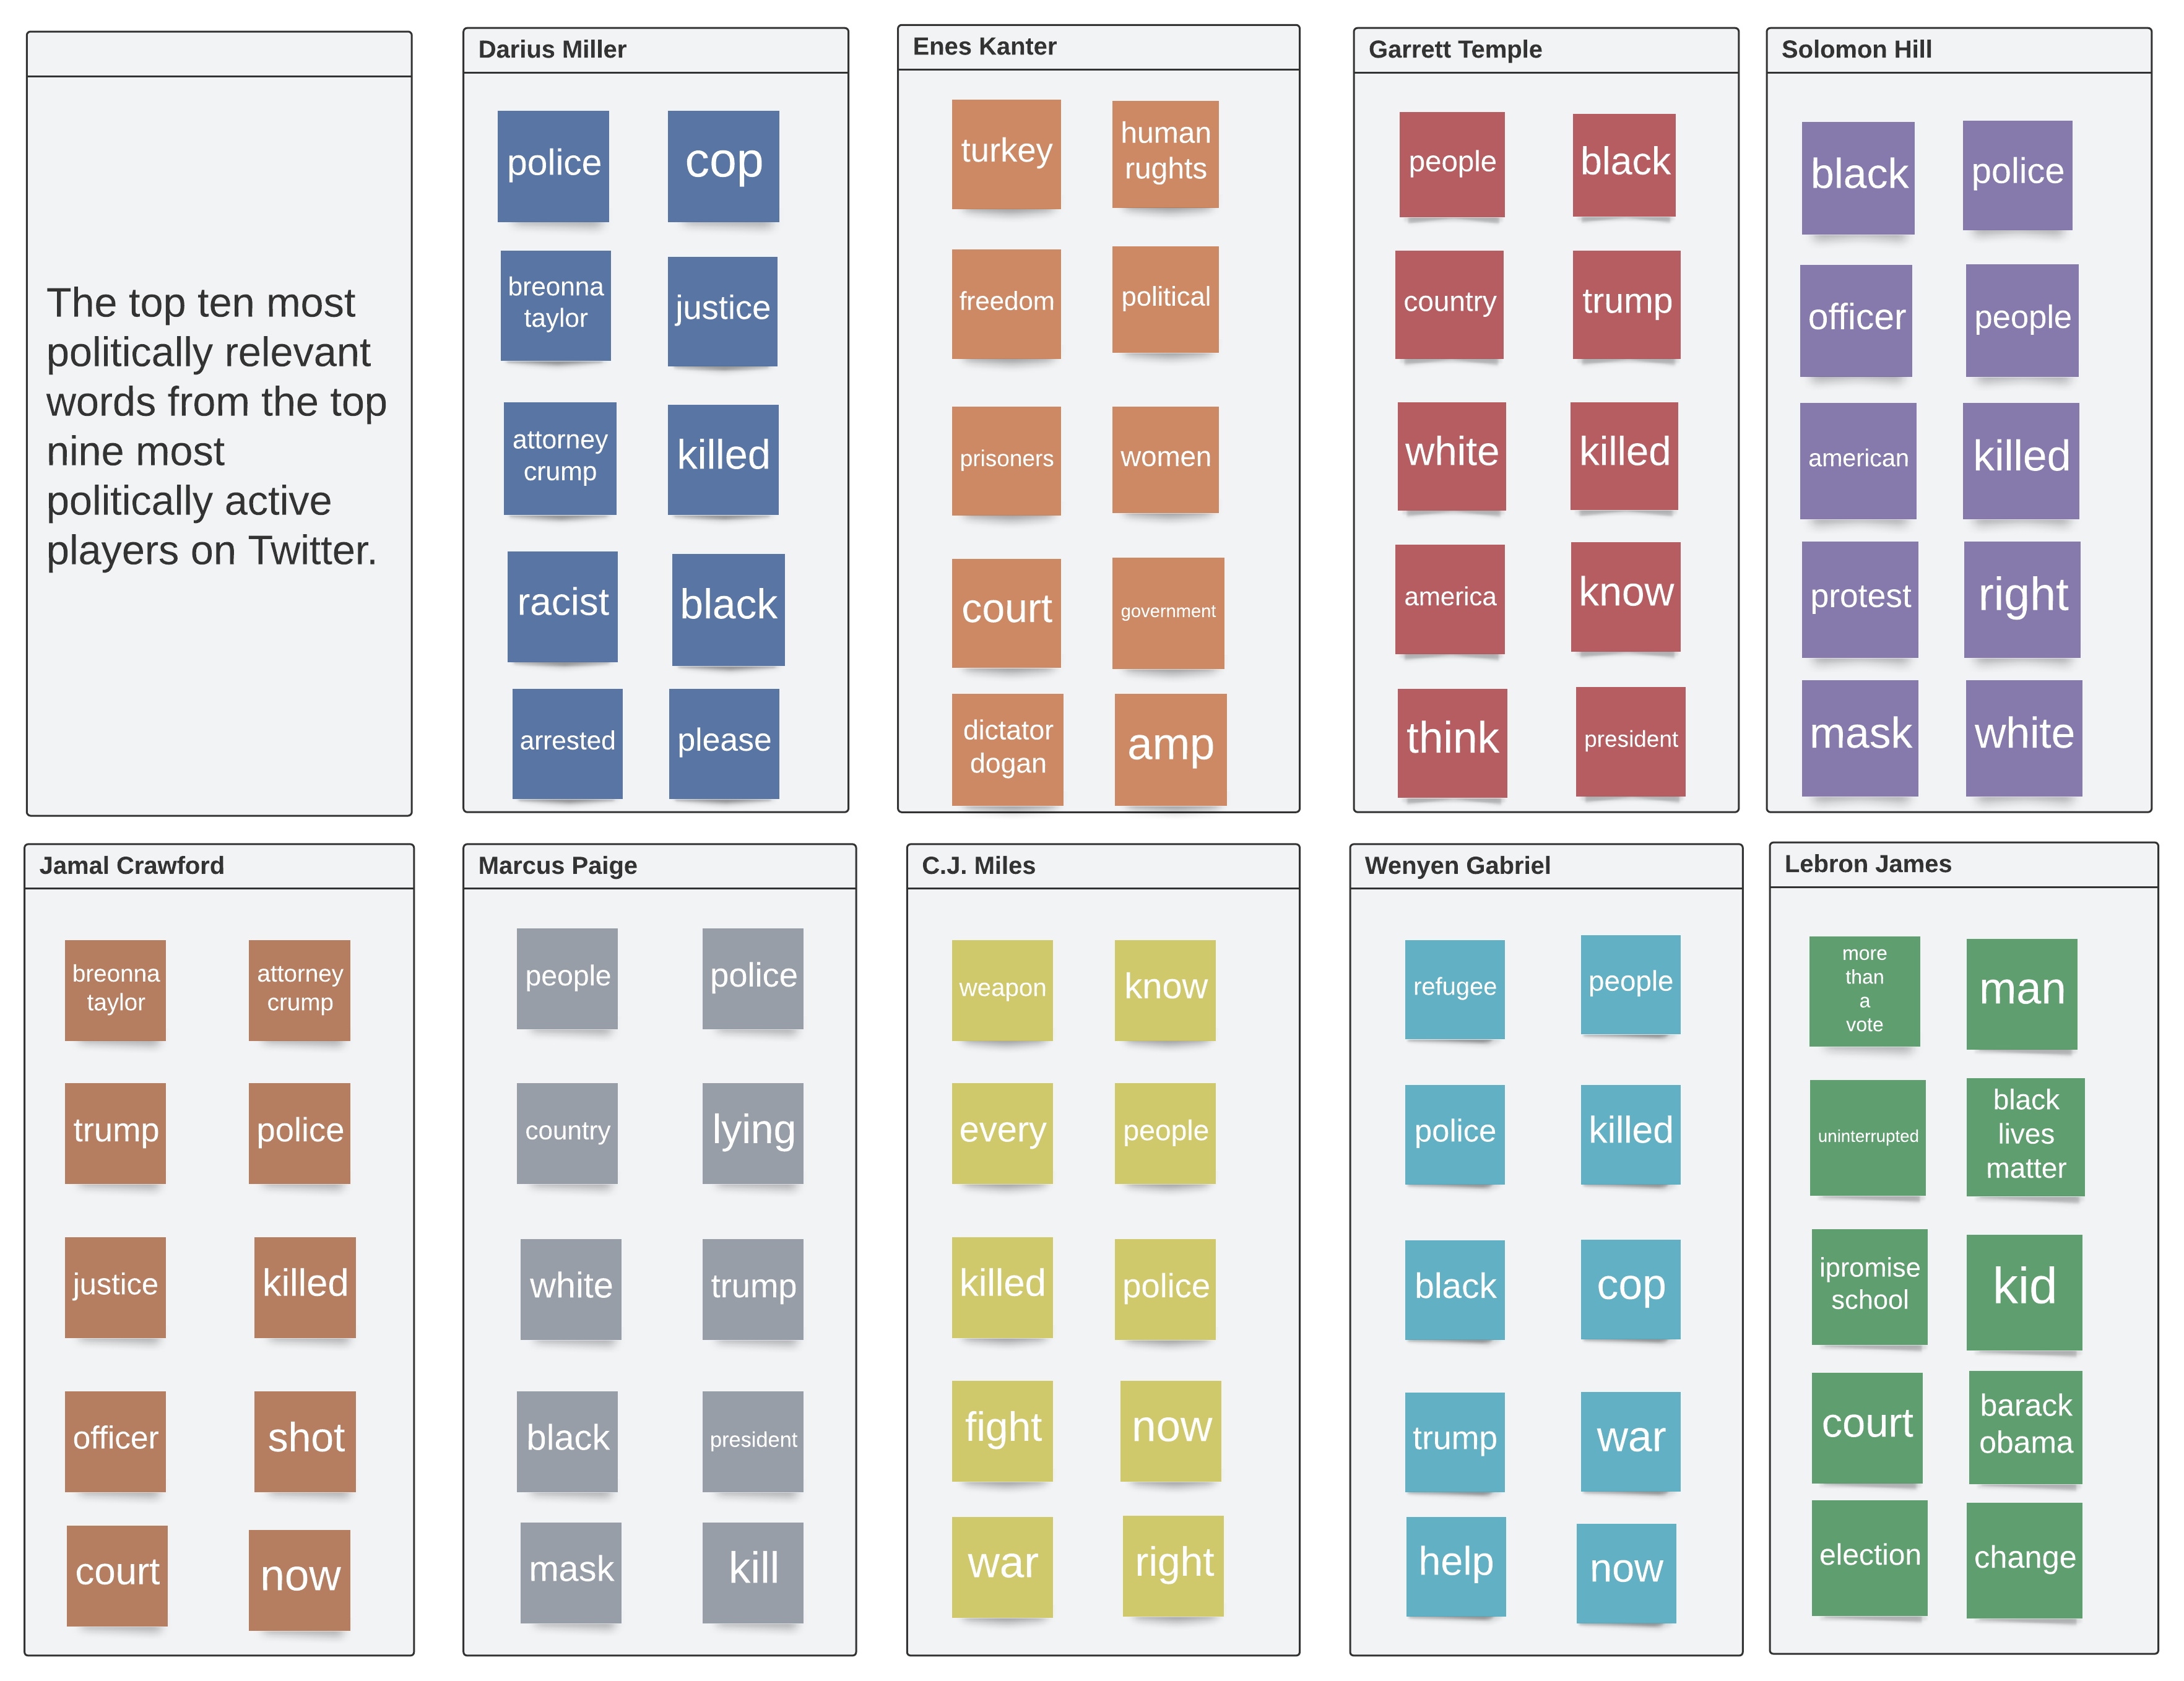

In [65]:
Image(filename="img/topic_model.png", width = 1200, height = 300)

### TM for LeBron's Political Tweets

In [66]:
lebron_tweets = pd.DataFrame(twitter_df.iloc[330]['full_text'])
lebron_tweets.columns=['text']

lebron_bools = pd.DataFrame(twitter_df.iloc[330]['political_bools'])
lebron_bools.columns=['bools']

lebron_df = pd.merge(lebron_tweets, lebron_bools, on = lebron_tweets.index)
lebron_pol_tweets = lebron_df[lebron_df['bools']==1]

lebron_pol_tweets['text_processed'] = \
lebron_pol_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
lebron_pol_tweets['text_processed'] = \
lebron_pol_tweets['text_processed'].map(lambda x: x.lower())

for i in lebron_pol_tweets['key_0']:
    lebron_pol_tweets['text_processed'][i] = re.sub(r"http\S+", "", lebron_pol_tweets['text_processed'][i])

for i in lebron_pol_tweets['key_0']:
    lebron_pol_tweets['text_processed'][i] = re.compile('\#').sub('', re.compile('rt @').sub('@', lebron_pol_tweets['text_processed'][i]).strip())

long_string = ','.join(list(lebron_pol_tweets['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
lebron_wc = wordcloud.to_image()

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = lebron_pol_tweets.text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

In [67]:
pyLDAvis.display(LDAvis_prepared)

One of Lebron James' most popular hashtags is #morethanavote, which he uses in order to bring light to the organization, which was launched amid the 2020 police brutality protests after the murder of George Floyd and Breonna Taylor in order to mobilize educate, protect, and mobilize Black voters. He also uses #ipromiseschool in reference to the elementary school for at-risk children, which his foundation supports in order to fight the educational gap experienced by at-risk children in low-income communities. By clicking on "morethanavote" and "ipromiseschool" in the visual, we are able to see that LeBron's political tweets are focused on community, empowerment, kids, families, home, privilege, and education.

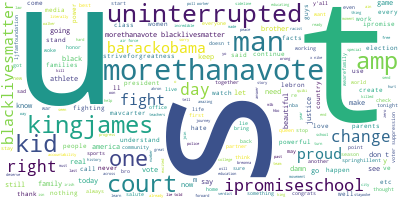

In [68]:
lebron_wc

### TM for Darius Miller's Political Tweets

In [69]:
miller_tweets = pd.DataFrame(twitter_df.iloc[446]['full_text'])
miller_tweets.columns=['text']

miller_bools = pd.DataFrame(twitter_df.iloc[446]['political_bools'])
miller_bools.columns=['bools']

miller_df = pd.merge(miller_tweets, miller_bools, on = miller_tweets.index)
miller_pol_tweets = miller_df[miller_df['bools']==1]

miller_pol_tweets['text_processed'] = \
miller_pol_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
miller_pol_tweets['text_processed'] = \
miller_pol_tweets['text_processed'].map(lambda x: x.lower())

for i in miller_pol_tweets['key_0']:
    miller_pol_tweets['text_processed'][i] = re.sub(r"http\S+", "", miller_pol_tweets['text_processed'][i])

for i in miller_pol_tweets['key_0']:
    miller_pol_tweets['text_processed'][i] = re.compile('\#').sub('', re.compile('rt @').sub('@', miller_pol_tweets['text_processed'][i]).strip())

long_string = ','.join(list(miller_pol_tweets['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
miller_wc = wordcloud.to_image()

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = miller_pol_tweets.text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

In [70]:
pyLDAvis.display(LDAvis_prepared)

By far the most salient term in Darius Miller's twets is "police", which we also see a lot as "cops". With police being most salient in topic 1, we are also able to see that among the most salient terms in topic 1 are Breonna Taylor, black, justice, officer, arrested, killed, brutality, media, right, protests, murdered, attorneycrump (the lead attorney of George Floyd's family's legal team), racism, and violently. With many of the other topics containing the same, or similar words, we are able to see that Darius Miller's tweets are centered around addressing criminal injustices in the African-American community.

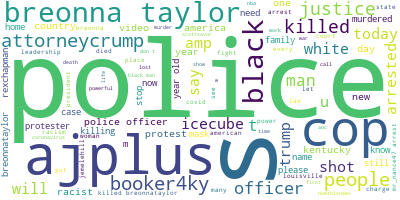

In [71]:
miller_wc

### TM for Enes Kanter's Political Tweets

In [72]:
kanter_tweets = pd.DataFrame(twitter_df.iloc[356]['full_text'])
kanter_tweets.columns=['text']

kanter_bools = pd.DataFrame(twitter_df.iloc[356]['political_bools'])
kanter_bools.columns=['bools']

kanter_df = pd.merge(kanter_tweets, kanter_bools, on = kanter_tweets.index)
kanter_pol_tweets = kanter_df[kanter_df['bools']==1]

kanter_pol_tweets['text_processed'] = \
kanter_pol_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
kanter_pol_tweets['text_processed'] = \
kanter_pol_tweets['text_processed'].map(lambda x: x.lower())

for i in kanter_pol_tweets['key_0']:
    kanter_pol_tweets['text_processed'][i] = re.sub(r"http\S+", "", kanter_pol_tweets['text_processed'][i])

for i in kanter_pol_tweets['key_0']:
    kanter_pol_tweets['text_processed'][i] = re.compile('\#').sub('', re.compile('rt @').sub('@', kanter_pol_tweets['text_processed'][i]).strip())

long_string = ','.join(list(kanter_pol_tweets['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
kanter_wc = wordcloud.to_image()

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = kanter_pol_tweets.text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

In [73]:
pyLDAvis.display(LDAvis_prepared)

The most salient term for Enes Kanter's tweets is Turkey, which comes to no suprise as he is essentially an enemy of the state in his home country of Turkey for being very outspoken against the Turkish president Erdogan's authoritative tyle of leadership. Turkey being the most salient in topics 4 and 1, we take a look at those topics and find that the terms turkish, rights, ramadan, human, political, people, government, dictatorerdogen, prisoners, terrorist, innocent, journalist, women, free, fight, justice, and freedom are among the most salient terms in those topics. It is evident that Enes Kanter's political tweets are centered around the Turkey's authoritarian-like government's violation of their own citizen's rights. After a failed coup of "president" Ergoden, he consolidated power and jailed thousands of political dissidents such as journalists, whistleblowers, and civil servants. Enes Kanter even had his own Turkish passport revoked and was accused of "terrorism" as a result of his outspokenness against Ergoden. 

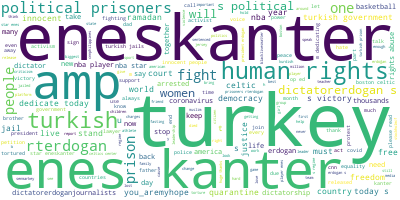

In [74]:
kanter_wc

### TM for Garret Temple's Political Tweets

In [75]:
temple_tweets = pd.DataFrame(twitter_df.iloc[608]['full_text'])
temple_tweets.columns=['text']

temple_bools = pd.DataFrame(twitter_df.iloc[608]['political_bools'])
temple_bools.columns=['bools']

temple_df = pd.merge(temple_tweets, temple_bools, on = temple_tweets.index)
temple_pol_tweets = temple_df[temple_df['bools']==1]

temple_pol_tweets['text_processed'] = \
temple_pol_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
temple_pol_tweets['text_processed'] = \
temple_pol_tweets['text_processed'].map(lambda x: x.lower())

for i in temple_pol_tweets['key_0']:
    temple_pol_tweets['text_processed'][i] = re.sub(r"http\S+", "", temple_pol_tweets['text_processed'][i])

for i in temple_pol_tweets['key_0']:
    temple_pol_tweets['text_processed'][i] = re.compile('\#').sub('', re.compile('rt @').sub('@', temple_pol_tweets['text_processed'][i]).strip())

long_string = ','.join(list(temple_pol_tweets['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
temple_wc = wordcloud.to_image()

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = temple_pol_tweets.text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

In [76]:
pyLDAvis.display(LDAvis_prepared)

Garret Temple's most salient term is "people," which has the highest saliency is topics 1, 2, and 4. Most of the terms in these topics - such as black, people, unarmed, man, killed, white, police, america, matter, killing, control, country, privilege, power, society, and cops - are pertaining to the police brutality epidemic, unbalanced racial power dynamics, and the killing of unarmed Black people. This makes a lot of sense since Garrett Temple is African-American and many NBA players, and the NBA keague itself, have used their platform to try to bring light to the Black Lives Matter movement, especially after the countless unfortunate injustices that occurred in 2020

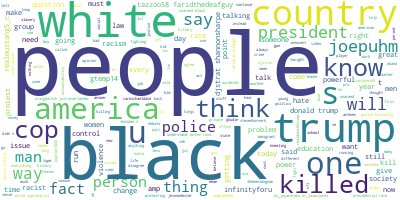

In [77]:
temple_wc

### TM for Solomon Hill's Political Tweets

In [78]:
hill_tweets = pd.DataFrame(twitter_df.iloc[292]['full_text'])
hill_tweets.columns=['text']

hill_bools = pd.DataFrame(twitter_df.iloc[292]['political_bools'])
hill_bools.columns=['bools']

hill_df = pd.merge(hill_tweets, hill_bools, on = hill_tweets.index)
hill_pol_tweets = hill_df[hill_df['bools']==1]

hill_pol_tweets['text_processed'] = \
hill_pol_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
hill_pol_tweets['text_processed'] = \
hill_pol_tweets['text_processed'].map(lambda x: x.lower())

for i in hill_pol_tweets['key_0']:
    hill_pol_tweets['text_processed'][i] = re.sub(r"http\S+", "", hill_pol_tweets['text_processed'][i])

for i in hill_pol_tweets['key_0']:
    hill_pol_tweets['text_processed'][i] = re.compile('\#').sub('', re.compile('rt @').sub('@', hill_pol_tweets['text_processed'][i]).strip())

long_string = ','.join(list(hill_pol_tweets['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
hill_wc = wordcloud.to_image()

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = hill_pol_tweets.text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

In [79]:
pyLDAvis.display(LDAvis_prepared)

The highest saliency terms for Solomon Hill are police, people, and black, which are most salient in topics 1 and 2. When we take a closer look at topics 1 and 2, we see that the most salient terms for those include police, people, black, officers, white, arrested Breonna Taylor, justice, americans, accountability, accountable, protesters, cops, killed, brutality, trump, and virus. Hill's tweets are mostly focused on police brutality cases, such as Breonna Taylor's and bringing justice to the case by holding the officers responsibe for her death accountable. It appears that a few of his tweets are also related to the corona virus pandemic.

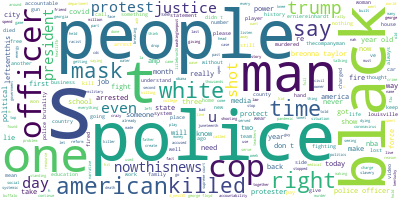

In [80]:
hill_wc

### TM for Jamal Crawford's Political Tweets

In [81]:
crawford_tweets = pd.DataFrame(twitter_df.iloc[158]['full_text'])
crawford_tweets.columns=['text']

crawford_bools = pd.DataFrame(twitter_df.iloc[158]['political_bools'])
crawford_bools.columns=['bools']

crawford_df = pd.merge(crawford_tweets, crawford_bools, on = crawford_tweets.index)
crawford_pol_tweets = crawford_df[crawford_df['bools']==1]

crawford_pol_tweets['text_processed'] = \
crawford_pol_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
crawford_pol_tweets['text_processed'] = \
crawford_pol_tweets['text_processed'].map(lambda x: x.lower())

for i in crawford_pol_tweets['key_0']:
    crawford_pol_tweets['text_processed'][i] = re.sub(r"http\S+", "", crawford_pol_tweets['text_processed'][i])

for i in crawford_pol_tweets['key_0']:
    crawford_pol_tweets['text_processed'][i] = re.compile('\#').sub('', re.compile('rt @').sub('@', crawford_pol_tweets['text_processed'][i]).strip())

long_string = ','.join(list(crawford_pol_tweets['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
crawford_wc = wordcloud.to_image()

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = crawford_pol_tweets.text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

In [82]:
pyLDAvis.display(LDAvis_prepared)

Jamal Crawford has very high saliency for the terms Breonna Taylor, Trump, justice, and black, which are most highly salient in topics 1, 2, 3, 4, and 5. The terms with the highest frequencies in the 5 of these topics overlap a lot because they are all related and they include terms Breonna Taylor, George Floyd, attorneycrump, protect, trump, person, racist, America, cops, people, shooting, police, arrest, chinese, justice, killed, deaths, act, black, fight, murder, community, covid, and matter. Crawford's political tweets are centered, for the most part, around the Breonna Taylor and George Floyd cases, which was a product of a racist country policed by racist cops. A common theme among players seems to be calls to action for holding offending officers accountable for the innocent people they murder, especially the disproportionate amount of Black victims. We did also detect Tweets relating to the covid-19 pandemic in Crawford's Tweets.

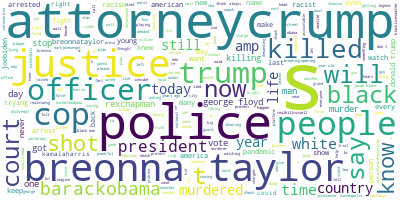

In [83]:
crawford_wc

### TM for Marcus Paige's Political Tweets

In [84]:
paige_tweets = pd.DataFrame(twitter_df.iloc[502]['full_text'])
paige_tweets.columns=['text']

paige_bools = pd.DataFrame(twitter_df.iloc[502]['political_bools'])
paige_bools.columns=['bools']

paige_df = pd.merge(paige_tweets, paige_bools, on = paige_tweets.index)
paige_pol_tweets = paige_df[paige_df['bools']==1]

paige_pol_tweets['text_processed'] = \
paige_pol_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
paige_pol_tweets['text_processed'] = \
paige_pol_tweets['text_processed'].map(lambda x: x.lower())

for i in paige_pol_tweets['key_0']:
    paige_pol_tweets['text_processed'][i] = re.sub(r"http\S+", "", paige_pol_tweets['text_processed'][i])

for i in paige_pol_tweets['key_0']:
    paige_pol_tweets['text_processed'][i] = re.compile('\#').sub('', re.compile('rt @').sub('@', paige_pol_tweets['text_processed'][i]).strip())

long_string = ','.join(list(paige_pol_tweets['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
paige_wc = wordcloud.to_image()

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = paige_pol_tweets.text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

In [85]:
pyLDAvis.display(LDAvis_prepared)

Marcus Paige's top three words are trump, people, and police, which have high frequencies in topics 1, 2, 3, 5, and 6. In these topics, we the that the terms with the highest frequencies include people, police, trump, country, died, kill, footage, union, officers, violence, protesting, gun, beating, lying, president, media, racist, white, failed, black, arrest, terrible, racism, kneeling, power, arrested, communities, murder, cops, us, voted, protest, america, control, crime, justice, and brutality.

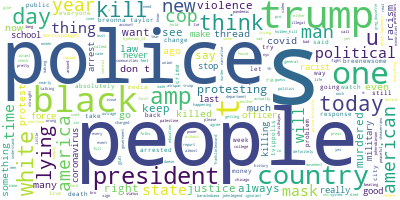

In [86]:
paige_wc

### TM for C.J. Miles' Political Tweets

In [87]:
miles_tweets = pd.DataFrame(twitter_df.iloc[445]['full_text'])
miles_tweets.columns=['text']

miles_bools = pd.DataFrame(twitter_df.iloc[445]['political_bools'])
miles_bools.columns=['bools']

miles_df = pd.merge(miles_tweets, miles_bools, on = miles_tweets.index)
miles_pol_tweets = miles_df[miles_df['bools']==1]

miles_pol_tweets['text_processed'] = \
miles_pol_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
miles_pol_tweets['text_processed'] = \
miles_pol_tweets['text_processed'].map(lambda x: x.lower())

for i in miles_pol_tweets['key_0']:
    miles_pol_tweets['text_processed'][i] = re.sub(r"http\S+", "", miles_pol_tweets['text_processed'][i])

for i in miles_pol_tweets['key_0']:
    miles_pol_tweets['text_processed'][i] = re.compile('\#').sub('', re.compile('rt @').sub('@', miles_pol_tweets['text_processed'][i]).strip())

long_string = ','.join(list(miles_pol_tweets['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
miles_wc = wordcloud.to_image()

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = miles_pol_tweets.text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

In [88]:
pyLDAvis.display(LDAvis_prepared)

C.J. Miles' most salient term is weapon, but it seems to only be mentioned a lot in topic 6. Other words with high frequency in topic 6 include us, fight, people, woke, child, ignorant, justice, mental, sexually, and assaulted. It seems that Miles' is talking about sexual assault the importance of mental health in topic 6. With mental health being a rising problem in the US and sexual assault being a huge factor in some people's mental health, it makes sense that these are in the same topic. We can see that since this topic is different from most of his other topics, it is on the far right of the x-axis, but when we look at the topics on the left of the x-axis, we see that Miles also tweets about the police brutality epidemic. We see that the terms with the highest frequencies in topics 1, 7, and 10 include police, america, Breonna, weapon, coronavirus, killed, George Floyd, cops, people, arrest, country, white, and act.

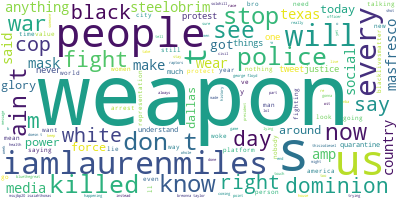

In [89]:
miles_wc

### TM for Wenyen Gabriel's Political Tweets

In [90]:
gabriel_tweets = pd.DataFrame(twitter_df.iloc[226]['full_text'])
gabriel_tweets.columns=['text']

gabriel_bools = pd.DataFrame(twitter_df.iloc[226]['political_bools'])
gabriel_bools.columns=['bools']

gabriel_df = pd.merge(gabriel_tweets, gabriel_bools, on = gabriel_tweets.index)
gabriel_pol_tweets = gabriel_df[gabriel_df['bools']==1]

gabriel_pol_tweets['text_processed'] = \
gabriel_pol_tweets['text'].map(lambda x: re.sub('[,\.!?]', '', x))
gabriel_pol_tweets['text_processed'] = \
gabriel_pol_tweets['text_processed'].map(lambda x: x.lower())

for i in gabriel_pol_tweets['key_0']:
    gabriel_pol_tweets['text_processed'][i] = re.sub(r"http\S+", "", gabriel_pol_tweets['text_processed'][i])

for i in gabriel_pol_tweets['key_0']:
    gabriel_pol_tweets['text_processed'][i] = re.compile('\#').sub('', re.compile('rt @').sub('@', gabriel_pol_tweets['text_processed'][i]).strip())

long_string = ','.join(list(gabriel_pol_tweets['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
gabriel_wc = wordcloud.to_image()

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = gabriel_pol_tweets.text_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

In [91]:
pyLDAvis.display(LDAvis_prepared)

Wenyen Gabriel's tweets has some terms with very high salience such as police, us, killed, refugees, sudan, trump, ban, cops, killed, racism, country, lying, and government. Similar to other NBA players, Gabriel bring light to the Black Lives Matter movement in topics 8 and 10 which contain words like us, trump, support, racism, black, petition, american, lives, matter, people, police, right, attack, killed, and death. Gabriel also tweets about some of Trump's immigrant policies, which he does not agree with such as the addition of Sudan to the travel ban during his presidency. We see this in topic 1, which contains the terms south, sudan, people, government, country, pandemic, war, gratitude, understand, killed,and america. 

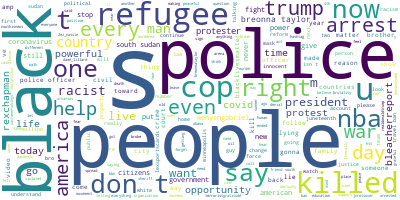

In [92]:
gabriel_wc

## Political Tweets' Effect on Players On-court Performance and Salary
Now we've had a better understanding of what consists of the NBA player's political tweets, we're going to analyze how political tweets affect players's salary, on-court performance, and we'll address political's tweets impact to the team in the later section

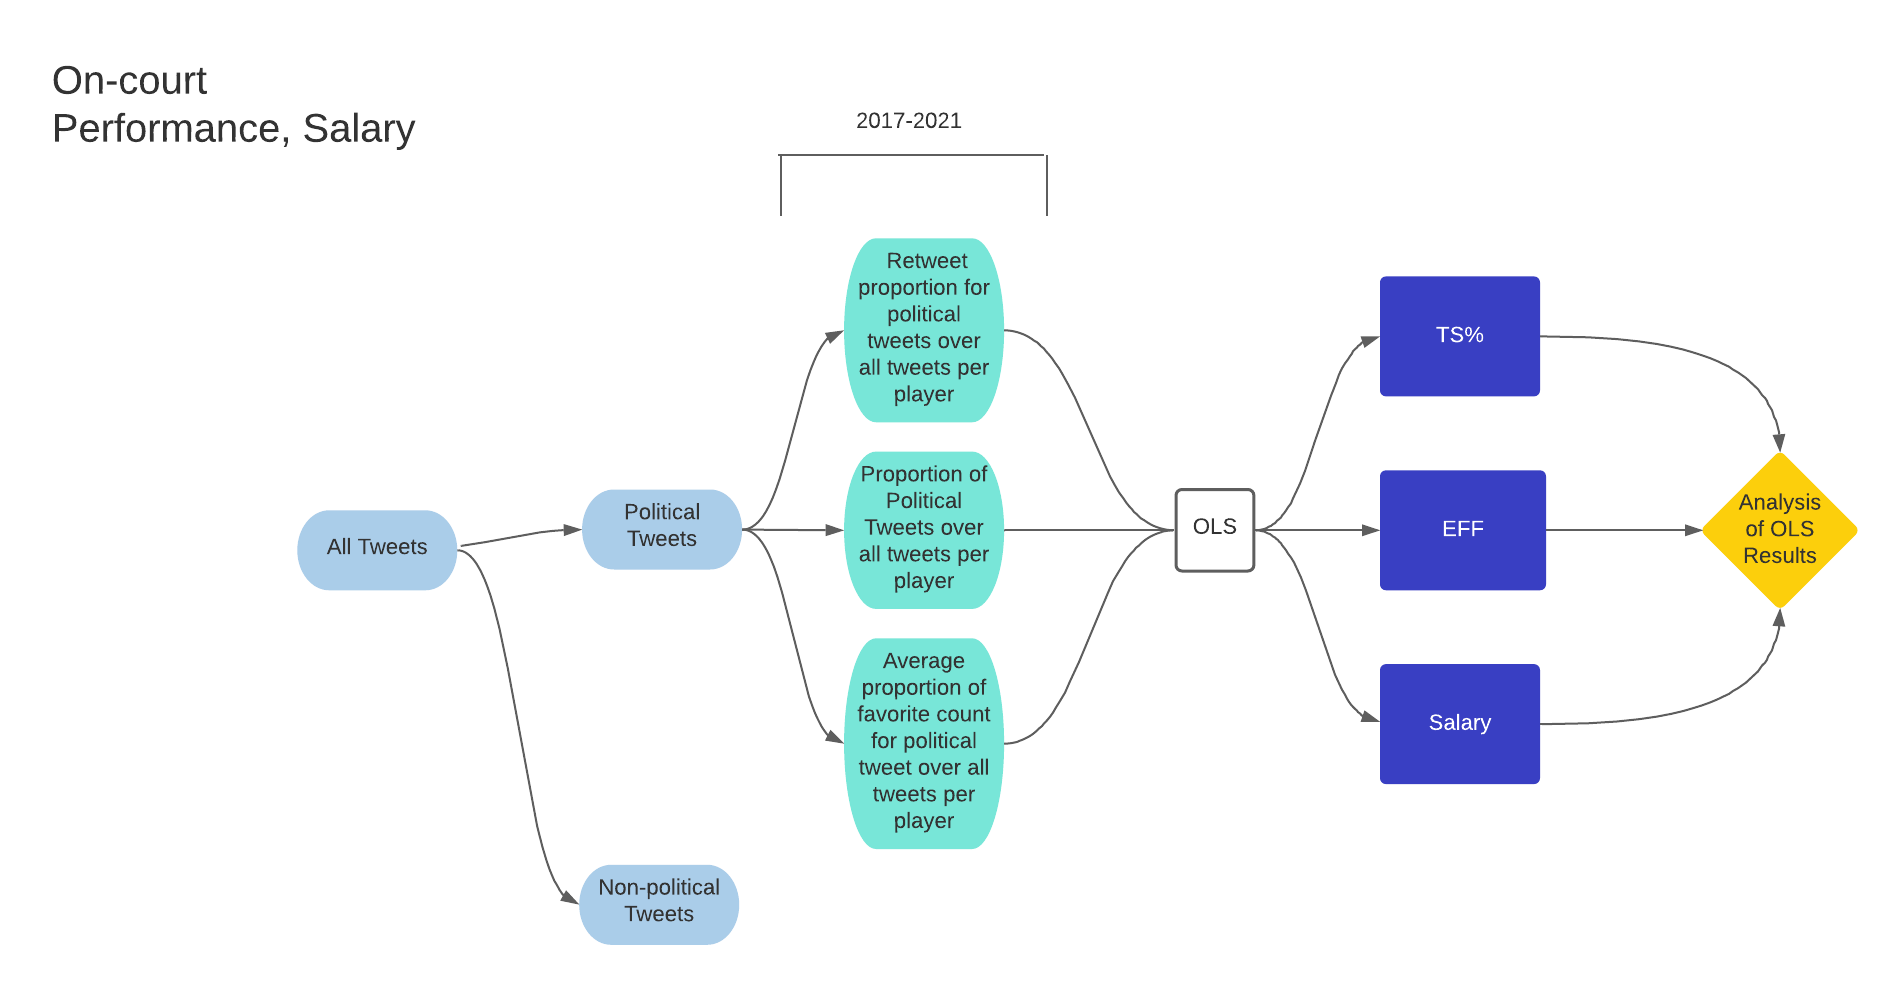

In [93]:
Image(filename="img/on-court_performance_and_salary.png", width = 1200, height = 300)

Before we dive into our analysis, first it's important to note the way we define our predictors
- $retweet \ proportion = \frac{avg \ retweet \ count \ of \ political \ tweets}{avg \ retweet \ count \ of \ political \ tweets + avg \ retweet \ count \ of \ nonpolitical \ tweets}$
- $political \ proportion = \frac{\# \ of \ political \ tweets}{\# \ of \ total \ tweets}$
- $favorite \ proportion = \frac{avg \ favorite \ count \ of \ political \ tweets}{avg \ favorite \ count \ of \ political \ tweets + avg \ favorite \ count \ of \ nonpolitical \ tweets}$

We use the proportion of Tweets, Retweets, and Favorites so that it weights the difference between more popular and less popular players more evenly. Players with higher social media followings tend to also post far more, which would cause a confounding variable of fame because those popular players would outweigh players who have small social media followings.


The way we evaulate player's on-court performance is through their 
- true shooting percentage: $TS\% = \frac {PTS}{2 * (.44 * FT_{attempted}) + FG_{attempted}}$
    - We utilizes John Hollinger's Player Efficiency Rating as it is one of the most commonly cited statistics when referring to a player's overall performance. It is calculated using the following equation:
- efficiency: $EFF = PTS + REB + AST + STL + BLK - FG_{missed} - FT_{missed} - TOV$
    - We also decided on using the True Shooting Percentage of a player. This is widely regarded as the best all encompassing measure of a player's shooting efficiency. We also chose it because the statistic more accurately reflects performance without taking points into account. In the vast majority of occasions a very efficient scorer is more desirable than an inefficient volume scorer.
    

### Naive Approach

In [94]:
player_dfs = [df_2017_stats, df_2018_stats, df_2019_stats, df_2020_stats]
player_dfs.append(pd.concat(player_dfs, axis=0))
seasons = ['2017-18', '2018-19', '2019-20', '2020-21', '2017-21']
predictors = ['political_proportion_by_year',  'political_retweet_proportion_by_year', 'political_favorite_proportion_by_year']

Now we're going to carry out OLS based on the predictors and outcomes defined above for all players in 2017-18, 2018-19, 2019-20, 2020-21, and the aggregated 2017-201 seasons

In [95]:
pvalue_2017 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}
pvalue_2018 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}
pvalue_2019 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}
pvalue_2020 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}
pvalue_2017_20 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}

pvalue_years = [pvalue_2017, pvalue_2018, pvalue_2019, pvalue_2020, pvalue_2017_20]

Report for true shooting percentage predicted by retweet proportion, political proportion, and favorite proportion

In [96]:
for idx, player_df in enumerate(player_dfs):
    outcome, predictors = patsy.dmatrices('TS_PC ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', player_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['TS_PC'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:                  TS_PC   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.925
Date:                Wed, 09 Jun 2021   Prob (F-statistic):             0.0339
Time:                        23:39:52   Log-Likelihood:                 443.14
No. Observations:                 340   AIC:                            -878.3
Df Residuals:                     336   BIC:                            -863.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Report for efficiency predicted by retweet proportion, political proportion, and favorite proportion

In [97]:
for idx, player_df in enumerate(player_dfs):
    outcome, predictors = patsy.dmatrices('EFF ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', player_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['EFF'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.1643
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.920
Time:                        23:39:52   Log-Likelihood:                -1114.1
No. Observations:                 340   AIC:                             2236.
Df Residuals:                     336   BIC:                             2252.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Report for salary predicted by retweet proportion, political proportion, and favorite proportion

In [98]:
for idx, player_df in enumerate(player_dfs):
    outcome, predictors = patsy.dmatrices('SALARY ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', player_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['SALARY'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.226
Date:                Wed, 09 Jun 2021   Prob (F-statistic):             0.0850
Time:                        23:39:52   Log-Likelihood:                -5869.0
No. Observations:                 340   AIC:                         1.175e+04
Df Residuals:                     336   BIC:                         1.176e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

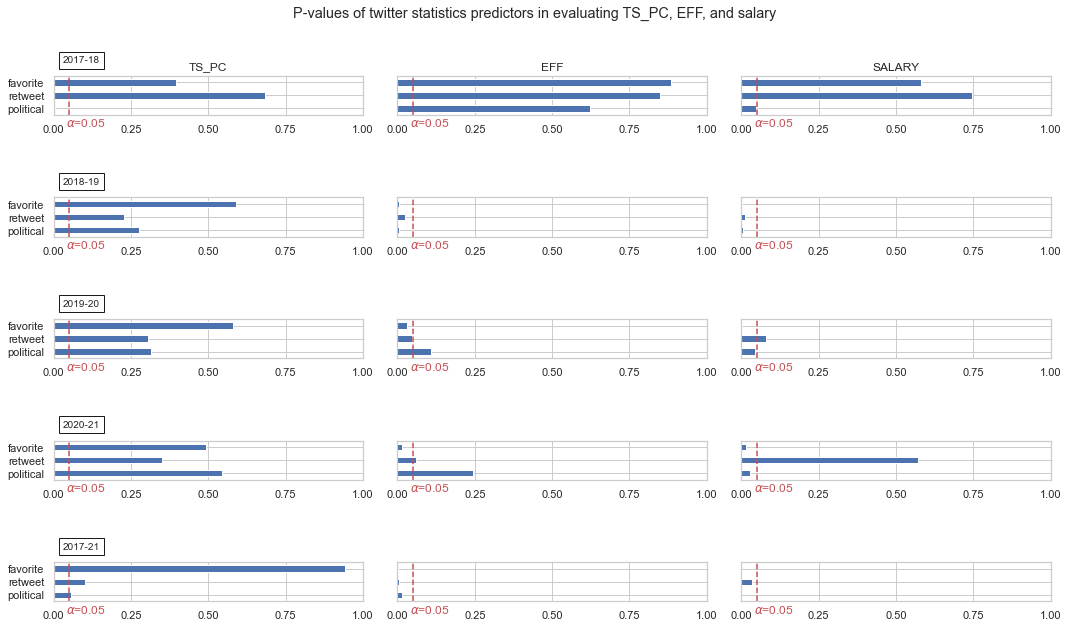

In [99]:
alpha = 0.05
xticks = np.linspace(0, 1, 5)
fig, axes = plt.subplots(5, 3, figsize=(15, 9))
fig.suptitle('P-values of twitter statistics predictors in evaluating TS_PC, EFF, and salary')
predictors = ['political', 'retweet', 'favorite']
for idx, player_df in enumerate(player_dfs):
    df = pd.DataFrame(pvalue_years[idx]).unstack().apply(pd.Series)
    df.index = list(zip(*df.index))[0]
    df.columns = predictors
    for i in range(3):
        ax = df.iloc[i].plot(kind='barh', ax=axes[idx, i], sharey=True);
        # only set title on the first row of the subplots
        if idx == 0:
            ax.set_title(df.index[i])
        # only set legend on the left most ax
        if i == 0:
            text = AnchoredText(seasons[idx],
                       loc='center left', prop=dict(size=10), frameon=True,
                       bbox_to_anchor=(0, 1.4),
                       bbox_transform=ax.transAxes)
            ax.add_artist(text)
        axes[idx, i].axvline(x=alpha, color='r', linestyle='--')
        axes[idx, i].text(alpha - 0.01, -1.4, s=r'$\alpha$=' + str(alpha), color='r')
        axes[idx, i].set_xticks(xticks)
plt.tight_layout()

Interestingly, here we see a lot of seemingly statistically significant variables. Unfortunately, this is due to problems with the Retweet proportion and the Favorite proportion of our data. There are farm more players in the NBA with very small social media followings than large social media followings. Because of this, the Retweet and Favorite proportions are 0.0 for many players. This causes there to be a confounding variable of fame as the most popular players tend to be the most successful. Our data ended up with the exact problem that we were trying to avoid, which is giving the most popular players far more impact in our data than players with small social media presences.


### Adjusted Approach with Thresholding
Next, we tried the same analysis, but after removing politically inactive players (political proportion <.05) and players whose Retweet proportion and Favorite proportion were both equal to 0. This does remove data, which is undesirable, but it removes only bad data which was causing inaccurate results.


In [100]:
player_dfs = [df_2017_stats, df_2018_stats, df_2019_stats, df_2020_stats]
player_dfs.append(pd.concat(player_dfs, axis=0))
seasons = ['2017-18', '2018-19', '2019-20', '2020-21', '2017-21']
predictors = ['political_proportion_by_year',  'political_retweet_proportion_by_year', 'political_favorite_proportion_by_year']

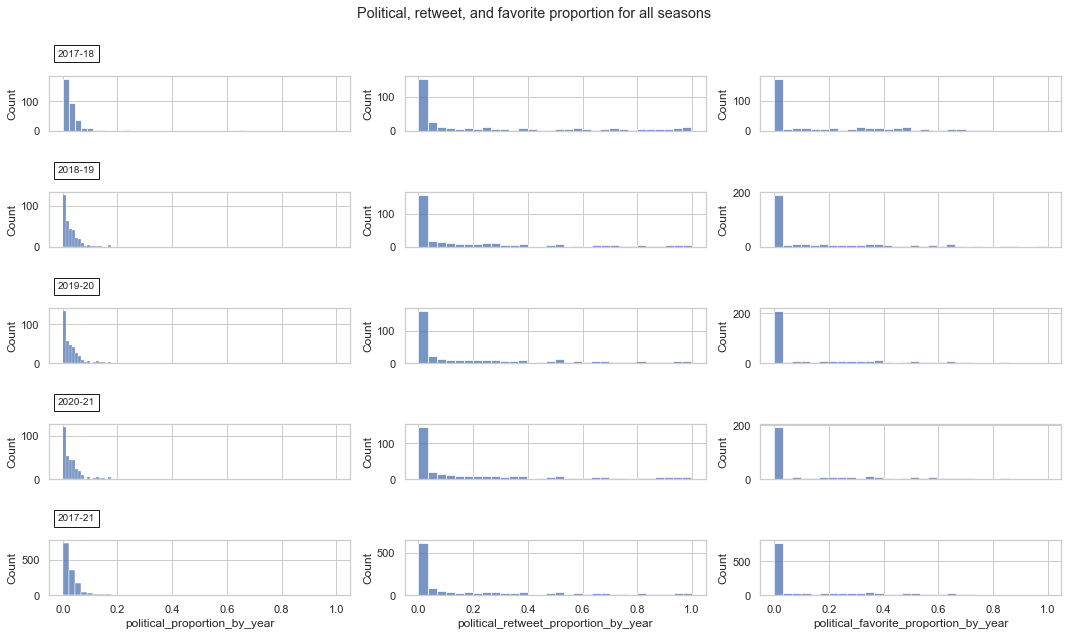

In [101]:
fig, axes = plt.subplots(5, 3, figsize=(15, 9), sharex=True)
fig.suptitle('Political, retweet, and favorite proportion for all seasons')
for i, player_df in enumerate(player_dfs):
    for j in range(3):
        ax = sns.histplot(data=player_df[predictors[j]], ax=axes[i, j], bins=30);
        # only set legend on the left most ax
        if j == 0:
            text = AnchoredText(seasons[i],
                       loc='center left', prop=dict(size=10), frameon=True,
                       bbox_to_anchor=(0, 1.4),
                       bbox_transform=ax.transAxes)
            ax.add_artist(text)
plt.tight_layout()

data loss during the adjustment in 2017-18: 87.058824 %
data loss during the adjustment in 2018-19: 86.363636 %
data loss during the adjustment in 2019-20: 88.547486 %
data loss during the adjustment in 2020-21: 86.826347 %
data loss during the adjustment in 2017-21: 87.210983 %


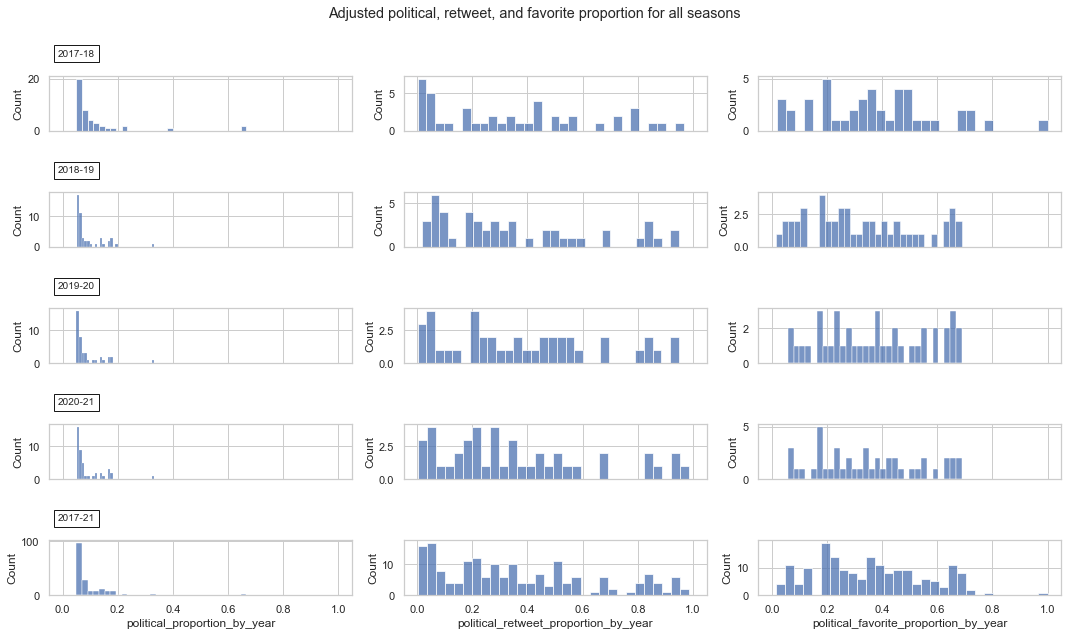

In [102]:
adjusted_player_dfs = []
fig, axes = plt.subplots(5, 3, figsize=(15, 9), sharex=True)
political_threshold = 0.05
favorite_threshold = 0
retweet_threshold = 0
fig.suptitle('Adjusted political, retweet, and favorite proportion for all seasons')
for i, player_df in enumerate(player_dfs):
    original_len = len(player_df)
    df = player_df[(player_df['political_proportion_by_year'] > political_threshold) & 
                   (player_df['political_retweet_proportion_by_year'] > retweet_threshold) &
                   (player_df['political_favorite_proportion_by_year'] > favorite_threshold)]
    print("data loss during the adjustment in %s: %f %%" % (seasons[i], (1 - len(df) / original_len) * 100))
    adjusted_player_dfs.append(df)
    for j in range(3):
        ax = sns.histplot(data=df[predictors[j]], ax=axes[i, j], bins=30);
        # only set legend on the left most ax
        if j == 0:
            text = AnchoredText(seasons[i],
                       loc='center left', prop=dict(size=10), frameon=True,
                       bbox_to_anchor=(0, 1.4),
                       bbox_transform=ax.transAxes)
            ax.add_artist(text)
plt.tight_layout()

After removing those players, we lost a lot of data, but we can still look for interesting relationships. It also regularized our data so there's a more even distribution of proportions.

Now we're going to carry out OLS based on the predictors and outcomes defined above for all players in 2017-18, 2018-19, 2019-20, 2020-21, and the aggregated 2017-201 seasons

In [103]:
pvalue_2017 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}
pvalue_2018 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}
pvalue_2019 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}
pvalue_2020 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}
pvalue_2017_20 = {
        'TS_PC': [],
        'EFF': [],
        'SALARY': []}

pvalue_years = [pvalue_2017, pvalue_2018, pvalue_2019, pvalue_2020, pvalue_2017_20]

Report for true shooting percentage predicted by retweet proportion, political proportion, and favorite proportion

In [104]:
for idx, player_df in enumerate(adjusted_player_dfs):
    outcome, predictors = patsy.dmatrices('TS_PC ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', player_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['TS_PC'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:                  TS_PC   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.407
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.255
Time:                        23:39:59   Log-Likelihood:                 61.996
No. Observations:                  44   AIC:                            -116.0
Df Residuals:                      40   BIC:                            -108.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Report for efficiency predicted by retweet proportion, political proportion, and favorite proportion

In [105]:
for idx, player_df in enumerate(adjusted_player_dfs):
    outcome, predictors = patsy.dmatrices('EFF ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', player_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['EFF'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:                    EFF   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.063
Method:                 Least Squares   F-statistic:                    0.1445
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.933
Time:                        23:39:59   Log-Likelihood:                -146.72
No. Observations:                  44   AIC:                             301.4
Df Residuals:                      40   BIC:                             308.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Report for salary predicted by retweet proportion, political proportion, and favorite proportion

In [106]:
for idx, player_df in enumerate(adjusted_player_dfs):
    outcome, predictors = patsy.dmatrices('SALARY ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', player_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['SALARY'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:                 SALARY   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.058
Method:                 Least Squares   F-statistic:                    0.2180
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.883
Time:                        23:39:59   Log-Likelihood:                -768.26
No. Observations:                  44   AIC:                             1545.
Df Residuals:                      40   BIC:                             1552.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

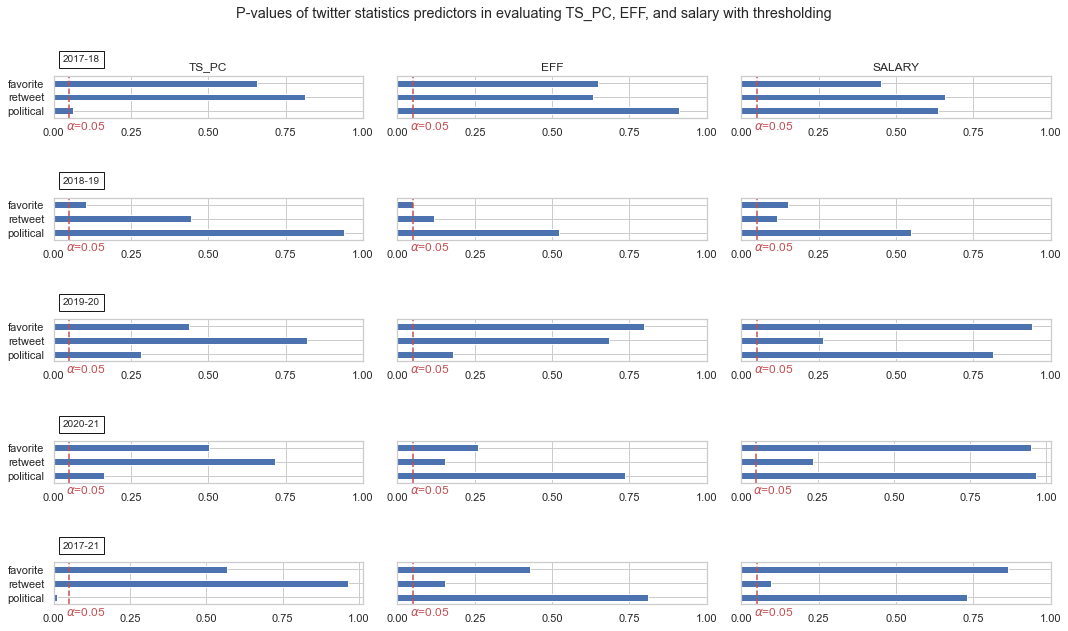

In [107]:
alpha = 0.05
xticks = np.linspace(0, 1, 5)
fig, axes = plt.subplots(5, 3, figsize=(15, 9))
fig.suptitle('P-values of twitter statistics predictors in evaluating TS_PC, EFF, and salary with thresholding')
predictors = ['political', 'retweet', 'favorite']
for idx, player_df in enumerate(adjusted_player_dfs):
    df = pd.DataFrame(pvalue_years[idx]).unstack().apply(pd.Series)
    df.index = list(zip(*df.index))[0]
    df.columns = predictors
    for i in range(3):
        ax = df.iloc[i].plot(kind='barh', ax=axes[idx, i], sharey=True);
        # only set title on the first row of the subplots
        if idx == 0:
            ax.set_title(df.index[i])
        # only set legend on the left most ax
        if i == 0:
            text = AnchoredText(seasons[idx],
                       loc='center left', prop=dict(size=10), frameon=True,
                       bbox_to_anchor=(0, 1.4),
                       bbox_transform=ax.transAxes)
            ax.add_artist(text)
        axes[idx, i].axvline(x=alpha, color='r', linestyle='--')
        axes[idx, i].text(alpha - 0.01, -1.3, s=r'$\alpha$=' + str(alpha), color='r')
        axes[idx, i].set_xticks(xticks)
plt.tight_layout()

After running the analysis again, the data seems far more reasonable. Interestingly, we still have a statistically significant variable of political proportion of Tweets relating to True Shooting Percentage for the aggregated data from 2017-21. This might sugggest that the reason of the predictors being statiscally insignificant might be simply due to the result of us having not enought data, as 2017-2018, ..., 2020-21 have all shown that political proportion is not significant enough to predict true shooting percentage, but the fact that the aggregate of these data do showcase we might need to obtain more data for more confident results.

## Players’ Political Tweet's Impact to the Team

Now we've analyzed the impacts of NBA players' political tweets to their on-court performance and salary, it's time to analyze player's political tweets in impacting their team's win percentage, field goal percentage, and assist/turnover ratio

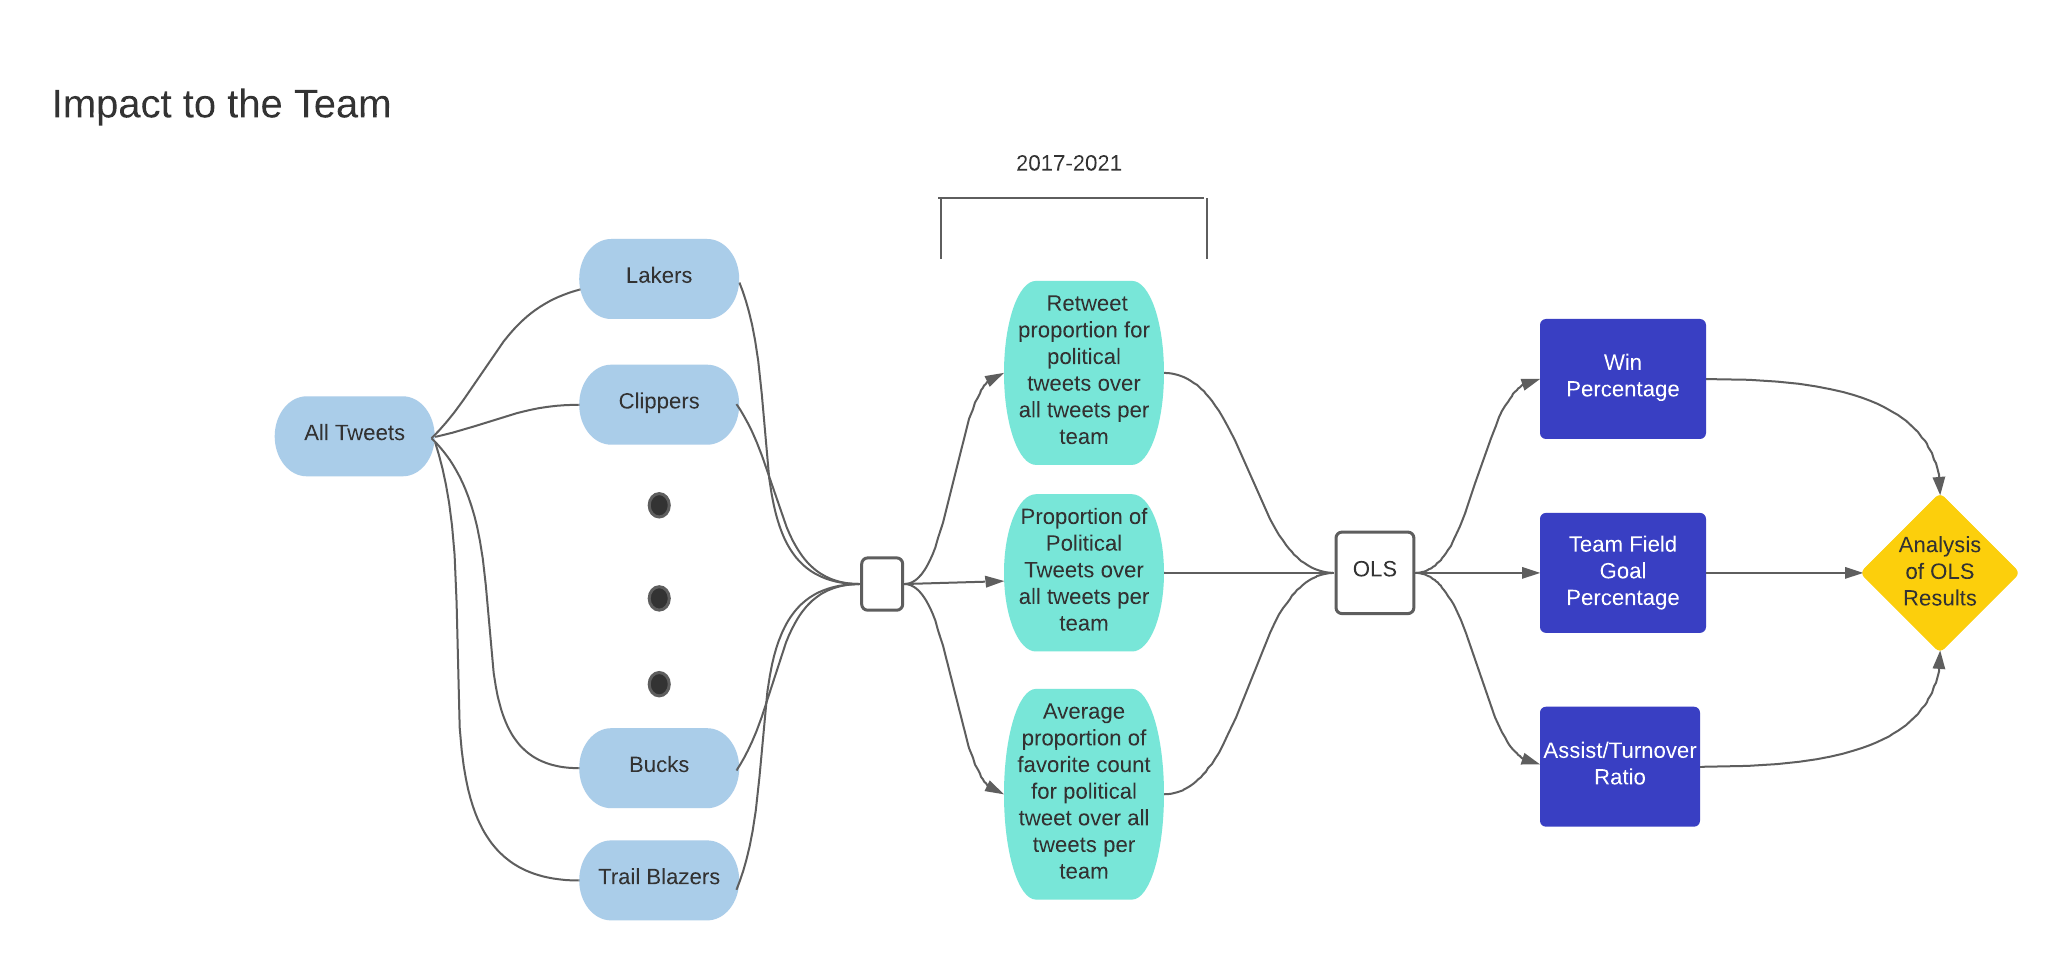

In [108]:
Image(filename="img/impact_to_the_team.png", width=1200, height=600)

- Following data sourced from https://www.basketball-reference.com/leagues/
- Contains league standings for all seasons of the NBA

We chose assist to turnover ratio as a good metric of a team's success. A team's assist turnover ratio is also the cumulative average assist turnover ratio between all the players, so we apply it to each player. It is widely regarded as one of the best metrics of a team's success because assists directly account for scoring, and turnovers account for the opposing team's successes


### Naive Approach

Similar to political tweet's impact on the player, we're going to look at the impact of political tweets to the teams with an naive approach, in which player with zero retweet, favorite proportions, or no political tweets at all are included

In [109]:
# Creates DF for each team at each year with mean values of player in each team
team_df_2017 = pd.DataFrame.from_dict(ast_tov_ratio_dict_2017, orient='index')
team_df_2017['TEAM_SHOOTING_PC'] = df_2017_stats.groupby('TEAM').mean()['TS_PC']
team_df_2017['TEAM_WIN_PC'] = df_2017_stats.groupby('TEAM').mean()['TEAM_WIN_PC']
team_df_2017['political_proportion_by_year'] = df_2017_stats.groupby('TEAM').mean()['political_proportion_by_year']
team_df_2017['political_retweet_proportion_by_year'] = df_2017_stats.groupby('TEAM').mean()['political_retweet_proportion_by_year']
team_df_2017['political_favorite_proportion_by_year'] = df_2017_stats.groupby('TEAM').mean()['political_favorite_proportion_by_year']
team_df_2017 = team_df_2017.reset_index()
team_df_2017 = team_df_2017.rename(columns={'index' : 'TEAM', 0 : 'AST_TOV_RATIO_TEAM'})

team_df_2018 = pd.DataFrame.from_dict(ast_tov_ratio_dict_2018, orient='index')
team_df_2018['TEAM_SHOOTING_PC'] = df_2018_stats.groupby('TEAM').mean()['TS_PC']
team_df_2018['TEAM_WIN_PC'] = df_2018_stats.groupby('TEAM').mean()['TEAM_WIN_PC']
team_df_2018['political_proportion_by_year'] = df_2018_stats.groupby('TEAM').mean()['political_proportion_by_year']
team_df_2018['political_retweet_proportion_by_year'] = df_2018_stats.groupby('TEAM').mean()['political_retweet_proportion_by_year']
team_df_2018['political_favorite_proportion_by_year'] = df_2018_stats.groupby('TEAM').mean()['political_favorite_proportion_by_year']
team_df_2018 = team_df_2018.reset_index()
team_df_2018 = team_df_2018.rename(columns={'index' : 'TEAM', 0 : 'AST_TOV_RATIO_TEAM'})

team_df_2019 = pd.DataFrame.from_dict(ast_tov_ratio_dict_2019, orient='index')
team_df_2019['TEAM_SHOOTING_PC'] = df_2019_stats.groupby('TEAM').mean()['TS_PC']
team_df_2019['TEAM_WIN_PC'] = df_2019_stats.groupby('TEAM').mean()['TEAM_WIN_PC']
team_df_2019['political_proportion_by_year'] = df_2019_stats.groupby('TEAM').mean()['political_proportion_by_year']
team_df_2019['political_retweet_proportion_by_year'] = df_2019_stats.groupby('TEAM').mean()['political_retweet_proportion_by_year']
team_df_2019['political_favorite_proportion_by_year'] = df_2019_stats.groupby('TEAM').mean()['political_favorite_proportion_by_year']
team_df_2019 = team_df_2019.reset_index()
team_df_2019 = team_df_2019.rename(columns={'index' : 'TEAM', 0 : 'AST_TOV_RATIO_TEAM'})

team_df_2020 = pd.DataFrame.from_dict(ast_tov_ratio_dict_2020, orient='index')
team_df_2020['TEAM_SHOOTING_PC'] = df_2020_stats.groupby('TEAM').mean()['TS_PC']
team_df_2020['TEAM_WIN_PC'] = df_2020_stats.groupby('TEAM').mean()['TEAM_WIN_PC']
team_df_2020['political_proportion_by_year'] = df_2020_stats.groupby('TEAM').mean()['political_proportion_by_year']
team_df_2020['political_retweet_proportion_by_year'] = df_2020_stats.groupby('TEAM').mean()['political_retweet_proportion_by_year']
team_df_2020['political_favorite_proportion_by_year'] = df_2020_stats.groupby('TEAM').mean()['political_favorite_proportion_by_year']
team_df_2020 = team_df_2020.reset_index()
team_df_2020 = team_df_2020.rename(columns={'index' : 'TEAM', 0 : 'AST_TOV_RATIO_TEAM'})

team_dfs = [team_df_2017, team_df_2018, team_df_2019, team_df_2020]
team_dfs.append(pd.concat(team_dfs, axis=0))

In [110]:
display(team_df_2020.head())
team_df_2020.shape

,TEAM,AST_TOV_RATIO_TEAM,TEAM_SHOOTING_PC,...,political_proportion_by_year,political_retweet_proportion_by_year,political_favorite_proportion_by_year
0,ATL,0.569711,0.567619,...,0.013256,0.202925,0.060056
1,BOS,0.564187,0.567702,...,0.028829,0.066571,0.129964
2,BRK,0.601261,0.606710,...,0.014533,0.051675,0.051498
3,CHI,0.556363,0.582205,...,0.030597,0.328857,0.157279
4,CHO,0.559869,0.559869,...,0.031600,0.175750,0.120340


(31, 7)

In [111]:
pvalue_2017 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}
pvalue_2018 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}
pvalue_2019 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}
pvalue_2020 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}
pvalue_2017_20 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}

pvalue_years = [pvalue_2017, pvalue_2018, pvalue_2019, pvalue_2020, pvalue_2017_20]

Report for team winning percentage predicted by retweet proportion, political proportion, and favorite proportion

In [112]:
for idx, team_df in enumerate(team_dfs):
    outcome, predictors = patsy.dmatrices('TEAM_WIN_PC ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', team_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['TEAM_WIN_PC'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:            TEAM_WIN_PC   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.098
Method:                 Least Squares   F-statistic:                    0.1374
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.937
Time:                        23:40:01   Log-Likelihood:                 15.274
No. Observations:                  30   AIC:                            -22.55
Df Residuals:                      26   BIC:                            -16.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Report for team shooting percentage predicted by retweet proportion, political proportion, and favorite proportion

In [113]:
for idx, team_df in enumerate(team_dfs):
    outcome, predictors = patsy.dmatrices('TEAM_SHOOTING_PC ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', team_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['TEAM_SHOOTING_PC'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:       TEAM_SHOOTING_PC   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.4338
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.731
Time:                        23:40:01   Log-Likelihood:                 80.501
No. Observations:                  31   AIC:                            -153.0
Df Residuals:                      27   BIC:                            -147.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Report for team assist-to-turn over ratio predicted by retweet proportion, political proportion, and favorite proportion

In [114]:
for idx, team_df in enumerate(team_dfs):
    outcome, predictors = patsy.dmatrices('AST_TOV_RATIO_TEAM ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', team_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['AST_TOV_RATIO_TEAM'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:     AST_TOV_RATIO_TEAM   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.3883
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.762
Time:                        23:40:01   Log-Likelihood:                 85.240
No. Observations:                  31   AIC:                            -162.5
Df Residuals:                      27   BIC:                            -156.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

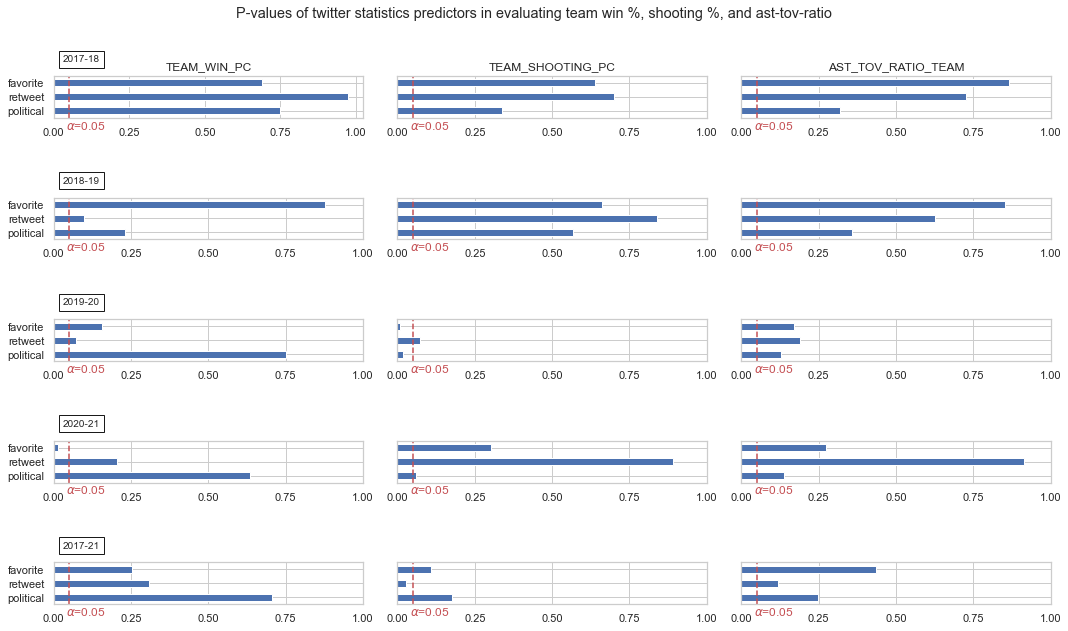

In [115]:
alpha = 0.05
xticks = np.linspace(0, 1, 5)
fig, axes = plt.subplots(5, 3, figsize=(15, 9))
fig.suptitle('P-values of twitter statistics predictors in evaluating team win %, shooting %, and ast-tov-ratio')
predictors = ['political', 'retweet', 'favorite']
for idx, team_df in enumerate(team_dfs):
    df = pd.DataFrame(pvalue_years[idx]).unstack().apply(pd.Series)
    df.index = list(zip(*df.index))[0]
    df.columns = predictors
    for i in range(3):
        ax = df.iloc[i].plot(kind='barh', ax=axes[idx, i], sharey=True);
        # only set title on the first row of the subplots
        if idx == 0:
            ax.set_title(df.index[i])
        # only set legend on the left most ax
        if i == 0:
            text = AnchoredText(seasons[idx],
                       loc='center left', prop=dict(size=10), frameon=True,
                       bbox_to_anchor=(0, 1.4),
                       bbox_transform=ax.transAxes)
            ax.add_artist(text)
        axes[idx, i].axvline(x=alpha, color='r', linestyle='--')
        axes[idx, i].text(alpha - 0.01, -1.3, s=r'$\alpha$=' + str(alpha), color='r')
        axes[idx, i].set_xticks(xticks)
plt.tight_layout()

Interestingly, here we see a lot of seemingly statistically significant variables such as the effect of favorite and political proportions in predicting team shooting percentage during 2019-2020. Unfortunately, this is due to problems with the Retweet proportion and the Favorite proportion of our data. There are far more players in the NBA with very small social media followings than large social media followings. Because of this, the Retweet and Favorite proportions are 0.0 for many players. This causes there to be a confounding variable of fame as the most popular players tend to be the most successful. In other words, the team consisting of more famed players are going to be the confounding variables that drive the team shooting percentage. However, fame is not reflected in the assist and turn over ratio, which one might expect as there is not as much correlation with assist and turnover ratio with fame of players. Our data ended up with the exact problem that we were trying to avoid, which is giving the more popular teams far more impact in our data than teams with small social media presences.

One thing to pay attention to is the favorite proportion in 2020-21. We can see that it is very statiscally significant with a very small p-value. We'll observe its pvalue closely again after the adjustment

### Adjusted Approach with Thresholding

In [116]:
political_threshold = 0.01
favorite_threshold = 0
retweet_threshold = 0

In [117]:
# Creates DF for each team at each year with mean values of player in each team
df = df_2017_stats
original_len = len(df)
df = df_2017_stats[(df['political_proportion_by_year'] > political_threshold) & 
                   (df['political_retweet_proportion_by_year'] > retweet_threshold) &
                   (df['political_favorite_proportion_by_year'] > favorite_threshold)].groupby('TEAM')
print("data loss during the adjustment in %s: %f %%" % ('2017-18', (1 - len(df) / original_len) * 100))
team_df_2017 = pd.DataFrame.from_dict(ast_tov_ratio_dict_2017, orient='index')
team_df_2017['TEAM_SHOOTING_PC'] = df.mean()['TS_PC']
team_df_2017['TEAM_WIN_PC'] = df.mean()['TEAM_WIN_PC']
team_df_2017['political_proportion_by_year'] = df.mean()['political_proportion_by_year']
team_df_2017['political_retweet_proportion_by_year'] = df.mean()['political_retweet_proportion_by_year']
team_df_2017['political_favorite_proportion_by_year'] = df.mean()['political_favorite_proportion_by_year']
team_df_2017 = team_df_2017.reset_index()
team_df_2017 = team_df_2017.rename(columns={'index' : 'TEAM', 0 : 'AST_TOV_RATIO_TEAM'})


df = df_2018_stats
original_len = len(df)
df = df_2018_stats[(df['political_proportion_by_year'] > political_threshold) & 
                   (df['political_retweet_proportion_by_year'] > retweet_threshold) &
                   (df['political_favorite_proportion_by_year'] > favorite_threshold)].groupby('TEAM')
print("data loss during the adjustment in %s: %f %%" % ('2018-19', (1 - len(df) / original_len) * 100))
team_df_2018 = pd.DataFrame.from_dict(ast_tov_ratio_dict_2018, orient='index')
team_df_2018['TEAM_SHOOTING_PC'] = df.mean()['TS_PC']
team_df_2018['TEAM_WIN_PC'] = df.mean()['TEAM_WIN_PC']
team_df_2018['political_proportion_by_year'] = df.mean()['political_proportion_by_year']
team_df_2018['political_retweet_proportion_by_year'] = df.mean()['political_retweet_proportion_by_year']
team_df_2018['political_favorite_proportion_by_year'] = df.mean()['political_favorite_proportion_by_year']
team_df_2018 = team_df_2018.reset_index()
team_df_2018 = team_df_2018.rename(columns={'index' : 'TEAM', 0 : 'AST_TOV_RATIO_TEAM'})

df = df_2019_stats
original_len = len(df)
df = df_2019_stats[(df['political_proportion_by_year'] > political_threshold) & 
                   (df['political_retweet_proportion_by_year'] > retweet_threshold) &
                   (df['political_favorite_proportion_by_year'] > favorite_threshold)].groupby('TEAM')
print("data loss during the adjustment in %s: %f %%" % ('2019-20', (1 - len(df) / original_len) * 100))
team_df_2019 = pd.DataFrame.from_dict(ast_tov_ratio_dict_2019, orient='index')
team_df_2019['TEAM_SHOOTING_PC'] = df.mean()['TS_PC']
team_df_2019['TEAM_WIN_PC'] = df.mean()['TEAM_WIN_PC']
team_df_2019['political_proportion_by_year'] = df.mean()['political_proportion_by_year']
team_df_2019['political_retweet_proportion_by_year'] = df.mean()['political_retweet_proportion_by_year']
team_df_2019['political_favorite_proportion_by_year'] = df.mean()['political_favorite_proportion_by_year']
team_df_2019 = team_df_2019.reset_index()
team_df_2019 = team_df_2019.rename(columns={'index' : 'TEAM', 0 : 'AST_TOV_RATIO_TEAM'})


df = df_2020_stats
original_len = len(df)
df = df_2020_stats[(df['political_proportion_by_year'] > political_threshold) & 
                   (df['political_retweet_proportion_by_year'] > retweet_threshold) &
                   (df['political_favorite_proportion_by_year'] > favorite_threshold)].groupby('TEAM')
print("data loss during the adjustment in %s: %f %%" % ('2020-21', (1 - len(df) / original_len) * 100))
team_df_2020 = pd.DataFrame.from_dict(ast_tov_ratio_dict_2020, orient='index')
team_df_2020['TEAM_SHOOTING_PC'] = df.mean()['TS_PC']
team_df_2020['TEAM_WIN_PC'] = df.mean()['TEAM_WIN_PC']
team_df_2020['political_proportion_by_year'] = df.mean()['political_proportion_by_year']
team_df_2020['political_retweet_proportion_by_year'] = df.mean()['political_retweet_proportion_by_year']
team_df_2020['political_favorite_proportion_by_year'] = df.mean()['political_favorite_proportion_by_year']
team_df_2020 = team_df_2020.reset_index()
team_df_2020 = team_df_2020.rename(columns={'index' : 'TEAM', 0 : 'AST_TOV_RATIO_TEAM'})

team_dfs = [team_df_2017, team_df_2018, team_df_2019, team_df_2020]
team_dfs.append(pd.concat(team_dfs, axis=0))

data loss during the adjustment in 2017-18: 90.882353 %
data loss during the adjustment in 2018-19: 91.193182 %
data loss during the adjustment in 2019-20: 91.620112 %
data loss during the adjustment in 2020-21: 91.317365 %


In [118]:
display(team_df_2020.head())
team_df_2020.shape

,TEAM,AST_TOV_RATIO_TEAM,TEAM_SHOOTING_PC,...,political_proportion_by_year,political_retweet_proportion_by_year,political_favorite_proportion_by_year
0,ATL,0.569711,0.548007,...,0.016393,0.003935,0.067906
1,BOS,0.564187,0.604930,...,0.040974,0.109375,0.285921
2,BRK,0.601261,0.670064,...,0.032000,0.395824,0.514978
3,CHI,0.556363,0.562009,...,0.037676,0.577354,0.314558
4,CHO,0.559869,0.581816,...,0.037910,0.204553,0.264747


(31, 7)

In [119]:
pvalue_2017 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}
pvalue_2018 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}
pvalue_2019 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}
pvalue_2020 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}
pvalue_2017_20 = {
        'TEAM_WIN_PC': [],
        'TEAM_SHOOTING_PC': [],
        'AST_TOV_RATIO_TEAM': []}

pvalue_years = [pvalue_2017, pvalue_2018, pvalue_2019, pvalue_2020, pvalue_2017_20]

Report for team winning percentage predicted by retweet proportion, political proportion, and favorite proportion

In [120]:
for idx, team_df in enumerate(team_dfs):
    outcome, predictors = patsy.dmatrices('TEAM_WIN_PC ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', team_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['TEAM_WIN_PC'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:            TEAM_WIN_PC   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.4632
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.710
Time:                        23:40:03   Log-Likelihood:                 15.819
No. Observations:                  30   AIC:                            -23.64
Df Residuals:                      26   BIC:                            -18.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Report for team shooting percentage predicted by retweet proportion, political proportion, and favorite proportion

In [121]:
for idx, team_df in enumerate(team_dfs):
    outcome, predictors = patsy.dmatrices('TEAM_SHOOTING_PC ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', team_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['TEAM_SHOOTING_PC'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:       TEAM_SHOOTING_PC   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.095
Method:                 Least Squares   F-statistic:                    0.1286
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.942
Time:                        23:40:03   Log-Likelihood:                 60.499
No. Observations:                  31   AIC:                            -113.0
Df Residuals:                      27   BIC:                            -107.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Report for team assist-to-turn over ratio predicted by retweet proportion, political proportion, and favorite proportion

In [122]:
for idx, team_df in enumerate(team_dfs):
    outcome, predictors = patsy.dmatrices('AST_TOV_RATIO_TEAM ~ political_proportion_by_year +  political_retweet_proportion_by_year + political_favorite_proportion_by_year', team_df)
    model = sm.OLS(outcome, predictors)
    result = model.fit()
    pvalue_years[idx]['AST_TOV_RATIO_TEAM'].append(result.pvalues[1:])
    print()
    print(seasons[idx])
    print()
    print(result.summary())


2017-18

                            OLS Regression Results                            
Dep. Variable:     AST_TOV_RATIO_TEAM   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.068
Method:                 Least Squares   F-statistic:                    0.3668
Date:                Wed, 09 Jun 2021   Prob (F-statistic):              0.778
Time:                        23:40:03   Log-Likelihood:                 85.205
No. Observations:                  31   AIC:                            -162.4
Df Residuals:                      27   BIC:                            -156.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

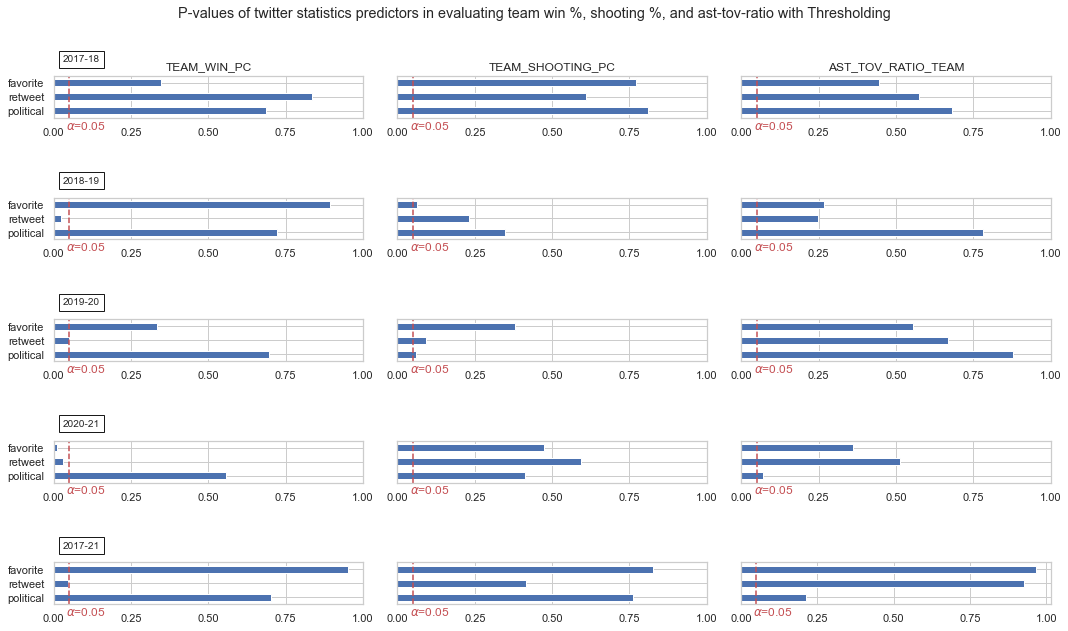

In [123]:
alpha = 0.05
xticks = np.linspace(0, 1, 5)
fig, axes = plt.subplots(5, 3, figsize=(15, 9))
fig.suptitle('P-values of twitter statistics predictors in evaluating team win %, shooting %, and ast-tov-ratio with Thresholding')
predictors = ['political', 'retweet', 'favorite']
for idx, team_df in enumerate(team_dfs):
    df = pd.DataFrame(pvalue_years[idx]).unstack().apply(pd.Series)
    df.index = list(zip(*df.index))[0]
    df.columns = predictors
    for i in range(3):
        ax = df.iloc[i].plot(kind='barh', ax=axes[idx, i], sharey=True);
        # only set title on the first row of the subplots
        if idx == 0:
            ax.set_title(df.index[i])
        # only set legend on the left most ax
        if i == 0:
            text = AnchoredText(seasons[idx],
                       loc='center left', prop=dict(size=10), frameon=True,
                       bbox_to_anchor=(0, 1.4),
                       bbox_transform=ax.transAxes)
            ax.add_artist(text)
        axes[idx, i].axvline(x=alpha, color='r', linestyle='--')
        axes[idx, i].text(alpha - 0.01, -1.3, s=r'$\alpha$=' + str(alpha), color='r')
        axes[idx, i].set_xticks(xticks)
plt.tight_layout()

After adjusted, majority of the statiscally significant variables become not statiscally significant. This can be simply due to the loss of data in the adjustment. However, this way we can ensure that fame of the player doesn't confound our analysis. On the other hand, we see that before the adjustment, we see that the favorite proportion during 2020-21 is statiscally significant in predicting team winning percentage; after the adjust it still is, with a p-value less than 0.01. Therefore, we confidently state that there is an relationship between favorite proporition and team winning percentage in 2020-21. We think the reason behind this relationship might be due to the increased interaction people have with social media and the heightened politcal climate during the pandemic, which drive people's support and liking of a team's political posts online to become more reflective of a team's performance, such as winning percentage. The similar rationale can be used to explain favorite proportion being a statiscally significant predictor of team winning percentage in 2020-2021. As for the retweet in predicting team winning percentage in the 2018-19 season, we have to perform a deeper analysis on it to be confident of our findings. 

# Ethics & Privacy

When analyzing data from public social media sites, it is important to verify that we are getting data on the correct people. We will ensure any data taken from twitter is only on public, verified NBA player twitter accounts. We will ensure no data is taken from any twitter account not belonging to an NBA player. We recognize that NBA player tweets may include the twitter handles of not NBA affiliated persons, so we also vow not to include any Twitter handles from non-NBA persons in any of our data analysis.

It is important to note that any political opinions expressed by NBA players are not our own. We respect all people's have their own political opinions and recognize that the information in one tweet cannot sum up all the motivations behind political beliefs. We also recognize that political beliefs are diverse and will include criteria from all areas of the political spectrum to include in our data analysis.

To ensure an unbiased analyzation of data for political activism, there will be data from twitter posts containing both negative and positive sentiment toward the political climate.


# Conclusion & Discussion

After an extensive data collection, cleaning, and analysis, we have come to the conclusion that in concurrence with our hypothesis, there is no direct correlation between the political tweet, retweet, and favorite proportion, and a player’s on-court performance, salary and impact to the team most of the time during 2017-2021. However, in terms of political's tweet's contribution to the team's success, there is some instances such as the relationship between favorite proporition and team winning percentage in 2020-21 which proved statiscally significant. A further step of the project will be to have a deeper dive into the favorite proportion of the tweets. For example, we might want to investigate what teams in particular is more indicative of this relationship, and if this team is more politically active compared to the previous years. 

Player-wise, while there were 709 players with twitter accounts, and around 350 of them having non-zero percentage of politically relevant tweets, our data still showed that we might not have enough data for our analysis. We observed this shortcoming when there was not a statiscally significant relationship for political proportion for any of the seasons from 2017-2021, but a statiscally significant relationship when we looked at the aggregate of the seasons.  

Some interesting thing we noticed is that there was a spike in political tweets, retweets, and favorites during 2020 and those tweets did reflect a common theme of political activism surrounding the black lives matter movement and police brutality, which showcased our classifers did capture the heightend political climate during 2020. 

# Team Contributions

Data Collection: Quinton Collected the NBA data from basketball-reference.com. Michael collected the Twitter data using a Twitter developer account with the Twitter API

Data Cleaning: Quinton also cleaned the NBA statistics data and put it into one DataFrame. David and Quinton cleaned the Twitter data to include the number of political tweets for NBA players.

Visualizations: Michael, Alex, and Lauren created the visualizations of the Twitter data and its relations with the NBA statistics data.

Writing: Lauren, Alex, and Michael have all done the work writing the intro, background, prior work, ethics and privacy, and our hypothesis.

Data Analysis: David, Quinton, Alex, Lauren and Michael have contributed to the analysis portion of the data and have come to a consensus for the results.